## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [201]:
# Import libraries 
import pandas as pd 
import numpy as np 
import sqlite3
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns

# For default view 
pd.set_option("display.max_columns", 50)


## Import Data 

### IMDB Dataset 1 

In [202]:
conn = sqlite3.connect("im.db")

# Create a cursor object
cursor = conn.cursor()

# Query to list all tables in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all results
tables = cursor.fetchall()

# Print the list of table names
print("Tables in the database:", [table[0] for table in tables])

Tables in the database: ['movie_basics', 'directors', 'known_for', 'movie_akas', 'movie_ratings', 'persons', 'principals', 'writers']


In [203]:
# loading the dataset
df_1 = pd.read_sql("""SELECT *FROM movie_basics;""",conn)

# loading the dataset
df_2 = pd.read_sql("""SELECT *FROM movie_ratings;""",conn)


### Inner join 

In [204]:
# Inner join merge df_1 and df_2
db_df = pd.merge(df_1, df_2, on = ['movie_id'], how = 'inner')
db_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [205]:
# Rename columns
db_df = db_df.rename(columns = {'primary_title':'title', 'movie_id':'id'})
db_df.head()

,id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


### Dataset 2

In [206]:
df_2 = pd.read_csv("tmdb.movies.csv")
df_2.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


### Strip whitespace from strings in a column

In [207]:
# Strip white spaces in columns 
df_2.columns = df_2.columns.str.strip().str.lower().str.replace(' ', '_')

# Strip white spaces in values 
df_2 = df_2.apply(lambda col: col.str.strip() if col.dtype == ["object", "number", "category"] else col)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   unnamed:_0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [208]:
df_2 = df_2.drop(columns=['unnamed:_0', 'genre_ids', 'original_language', 'popularity', 
                          'original_title','vote_count', 'id', 'vote_average' ], errors="ignore")
df_2.head()

,release_date,title
0,2010-11-19,Harry Potter and the Deathly Hallows: Part 1
1,2010-03-26,How to Train Your Dragon
2,2010-05-07,Iron Man 2
3,1995-11-22,Toy Story
4,2010-07-16,Inception


In [209]:
# Convert release date to datetime format
df_2['release_date'] = pd.to_datetime(df_2['release_date'])
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   release_date  26517 non-null  datetime64[ns]
 1   title         26517 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 414.5+ KB


In [210]:
df_2 = df_2.drop_duplicates()
df_2.duplicated().sum()

0

## Merge datasets 

In [211]:
df = pd.merge(db_df, df_2, on = ['title'], how = 'left')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75828 entries, 0 to 75827
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               75828 non-null  object        
 1   title            75828 non-null  object        
 2   original_title   75828 non-null  object        
 3   start_year       75828 non-null  int64         
 4   runtime_minutes  68101 non-null  float64       
 5   genres           75011 non-null  object        
 6   averagerating    75828 non-null  float64       
 7   numvotes         75828 non-null  int64         
 8   release_date     18893 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.2+ MB


In [212]:
df.head()

,id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,NaT
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,NaT
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2018-11-02
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13,NaT
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,NaT


In [213]:
df = df.dropna()

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18268 entries, 2 to 75816
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               18268 non-null  object        
 1   title            18268 non-null  object        
 2   original_title   18268 non-null  object        
 3   start_year       18268 non-null  int64         
 4   runtime_minutes  18268 non-null  float64       
 5   genres           18268 non-null  object        
 6   averagerating    18268 non-null  float64       
 7   numvotes         18268 non-null  int64         
 8   release_date     18268 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 1.4+ MB


In [215]:
df.head()

,id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2018-11-02
13,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,2018-11-06
16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,2013-05-07
19,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123,2013-08-11
25,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219,2010-01-01


In [216]:
df.duplicated().sum()

0

# Feature engineering 

## Movie Age 
- Labeling movies as old, classics and modern

In [217]:
def age_of_movie(value):
    if value <= 1980:
        return 'Old'
    
    elif 1928 <= value <= 2000:
        return 'Classic' 
    else:
        return 'Modern'
    
df['movie_age'] = df['start_year'].apply(age_of_movie)  
df.head()

,id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie_age
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2018-11-02,Modern
13,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,2018-11-06,Modern
16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,2013-05-07,Modern
19,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123,2013-08-11,Modern
25,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219,2010-01-01,Modern


## Classifying movies according to length 

In [218]:
def movie_duration(value):
    if value <= 60:
        return 'Short'
    
    elif 60 <= value <= 120:
        return 'Medium' 
    
    else:
        return 'Long'
    
df['movie_length'] = df['runtime_minutes'].apply(movie_duration)  
df.head()

,id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie_age,movie_length
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2018-11-02,Modern,Long
13,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,2018-11-06,Modern,Medium
16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,2013-05-07,Modern,Medium
19,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123,2013-08-11,Modern,Medium
25,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219,2010-01-01,Modern,Medium


## Calculating a weighted  measure to rate movies

In [219]:
import pandas as pd
import numpy as np

# Global average rating
C = df['averagerating'].mean()

# Minimum votes threshold (80th percentile)
m = df['numvotes'].quantile(0.8)

# Bayesian Average Function
def bayesian_average(row, C, m):
    v = row['numvotes']
    R = row['averagerating']
    return (v / (v + m) * R) + (m / (v + m) * C)

# Apply Bayesian Average to each row
df['adjusted_movie_rating'] = df.apply(lambda row: bayesian_average(row, C, m), axis=1)

# Print the result to verify
df.head()


,id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie_age,movie_length,adjusted_movie_rating
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2018-11-02,Modern,Long,6.393036
13,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,2018-11-06,Modern,Medium,5.873616
16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,2013-05-07,Modern,Medium,3.346636
19,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123,2013-08-11,Modern,Medium,5.902448
25,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219,2010-01-01,Modern,Medium,5.812782


In [220]:
df['title_similarity'] = (df['title'] != df['original_title']).astype(int)
df.head()

,id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie_age,movie_length,adjusted_movie_rating,title_similarity
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2018-11-02,Modern,Long,6.393036,0
13,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,2018-11-06,Modern,Medium,5.873616,1
16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,2013-05-07,Modern,Medium,3.346636,0
19,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123,2013-08-11,Modern,Medium,5.902448,0
25,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219,2010-01-01,Modern,Medium,5.812782,0


- How title change affects rating, number of votes etc

## Creating Seasons columns 

In [221]:
df['release_date'] = pd.to_datetime(df['release_date'])

df['release_date'] = pd.to_datetime(df['release_date'])

# Extract 'Year' from the 'Date' column
df['month'] = df['release_date'].dt.month



In [222]:
def categorize_seasons(month):
    
    if month in [12, 1, 2]:
        return 'Winter'
    
    elif month in [3, 4, 5]:
        return 'Spring'
    
    elif month in [6, 7, 8]:
        return 'Summer'
    
    elif month in [9, 10, 11]:
        return 'Fall'
    
df['season'] = df['month'].apply(categorize_seasons)

df.head()
    

,id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie_age,movie_length,adjusted_movie_rating,title_similarity,month,season
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2018-11-02,Modern,Long,6.393036,0,11,Fall
13,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,2018-11-06,Modern,Medium,5.873616,1,11,Fall
16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,2013-05-07,Modern,Medium,3.346636,0,5,Spring
19,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123,2013-08-11,Modern,Medium,5.902448,0,8,Summer
25,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219,2010-01-01,Modern,Medium,5.812782,0,1,Winter


## Creating movie ratings 

In [223]:
def movie_ratings(value):
    if value <= 4.9:
        return 'low'
    
    elif 5.0 <= value <= 7.9:
        return 'Average' 
    
    else:
        return 'High'
    
df['movie_rating'] = df['averagerating'].apply(movie_ratings)  
df.head()

,id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie_age,movie_length,adjusted_movie_rating,title_similarity,month,season,movie_rating
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2018-11-02,Modern,Long,6.393036,0,11,Fall,Average
13,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,2018-11-06,Modern,Medium,5.873616,1,11,Fall,low
16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,2013-05-07,Modern,Medium,3.346636,0,5,Spring,low
19,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123,2013-08-11,Modern,Medium,5.902448,0,8,Summer,Average
25,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219,2010-01-01,Modern,Medium,5.812782,0,1,Winter,low


## Genre list 

In [224]:
# Split the 'genres' column into a list but keep the original column
df['genres_list'] = df['genres'].str.split(',')  

# Expand the 'genres_list' into separate columns
genres_expanded = df['genres_list'].apply(pd.Series)  
genres_expanded = genres_expanded.rename(columns=lambda x: f'genre_{x+1}')  # Rename the columns

# Concatenate the new columns with the original DataFrame
df = pd.concat([df, genres_expanded], axis=1)


In [225]:
# Step 1: Create a new column for processing
df['genre_processed'] = df['genres'].str.split(',')

# Step 2: Apply transformations according to the specifications
def process_genres(genre_list):
    if len(genre_list) == 1:
        return genre_list[0]  # Leave single genre as it is
    elif len(genre_list) == 2:
        return f"{genre_list[0]} & {genre_list[1]}"  # Replace comma with '&'
    else:
        return f"{genre_list[0]} & {genre_list[1]}"  # Keep only the first two, use '&'

# Step 3: Apply the function to 'genre_processed' and store the result in a new column
df['genre_combined'] = df['genre_processed'].apply(process_genres)

# Step 4: Check the result
df[['genres', 'genre_combined']]


,genres,genre_combined
2,Drama,Drama
13,Drama,Drama
16,"Action,Animation,Comedy",Action & Animation
19,"Biography,Comedy,Drama",Biography & Comedy
25,Comedy,Comedy
...,...,...
75614,"Action,Crime,Thriller",Action & Crime
75686,Thriller,Thriller
75802,Comedy,Comedy
75815,Documentary,Documentary


In [226]:
df.head()

,id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie_age,movie_length,adjusted_movie_rating,title_similarity,month,season,movie_rating,genres_list,genre_1,genre_2,genre_3,genre_processed,genre_combined
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2018-11-02,Modern,Long,6.393036,0,11,Fall,Average,[Drama],Drama,NaN,NaN,[Drama],Drama
13,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,2018-11-06,Modern,Medium,5.873616,1,11,Fall,low,[Drama],Drama,NaN,NaN,[Drama],Drama
16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,2013-05-07,Modern,Medium,3.346636,0,5,Spring,low,"[Action, Animation, Comedy]",Action,Animation,Comedy,"[Action, Animation, Comedy]",Action & Animation
19,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123,2013-08-11,Modern,Medium,5.902448,0,8,Summer,Average,"[Biography, Comedy, Drama]",Biography,Comedy,Drama,"[Biography, Comedy, Drama]",Biography & Comedy
25,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219,2010-01-01,Modern,Medium,5.812782,0,1,Winter,low,[Comedy],Comedy,NaN,NaN,[Comedy],Comedy


In [227]:
df = df.drop(columns=['genre_2', 'genre_3'], errors='ignore')
df.head()

,id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie_age,movie_length,adjusted_movie_rating,title_similarity,month,season,movie_rating,genres_list,genre_1,genre_processed,genre_combined
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2018-11-02,Modern,Long,6.393036,0,11,Fall,Average,[Drama],Drama,[Drama],Drama
13,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,2018-11-06,Modern,Medium,5.873616,1,11,Fall,low,[Drama],Drama,[Drama],Drama
16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,2013-05-07,Modern,Medium,3.346636,0,5,Spring,low,"[Action, Animation, Comedy]",Action,"[Action, Animation, Comedy]",Action & Animation
19,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123,2013-08-11,Modern,Medium,5.902448,0,8,Summer,Average,"[Biography, Comedy, Drama]",Biography,"[Biography, Comedy, Drama]",Biography & Comedy
25,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219,2010-01-01,Modern,Medium,5.812782,0,1,Winter,low,[Comedy],Comedy,[Comedy],Comedy


# Univariate Analysis

##  Runtime Analysis

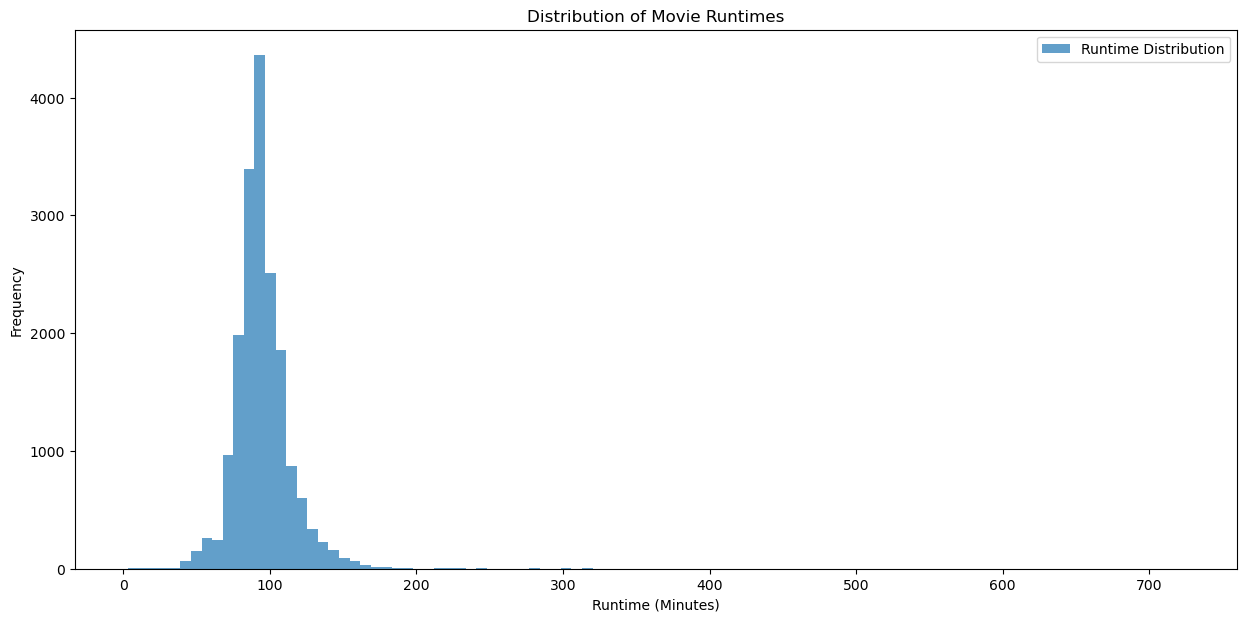

In [228]:
# Set the figure size before plotting
plt.figure(figsize=(15,7))

# Plot the histogram and set the label directly
plt.hist(df['runtime_minutes'], bins=100, alpha=0.7, label='Runtime Distribution')

# Set labels and title
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()


### Observation 
- From the above we can see that most movies runtime is about 100minutes. hence when while choosing runtime for the movie it should fall between 90 and 110 minutes.

### Observation 
- From the above we can see that most movies runtime is about 100 minutes. hence when while choosing runtime for the movie it should fall between 90 and 110 minutes.

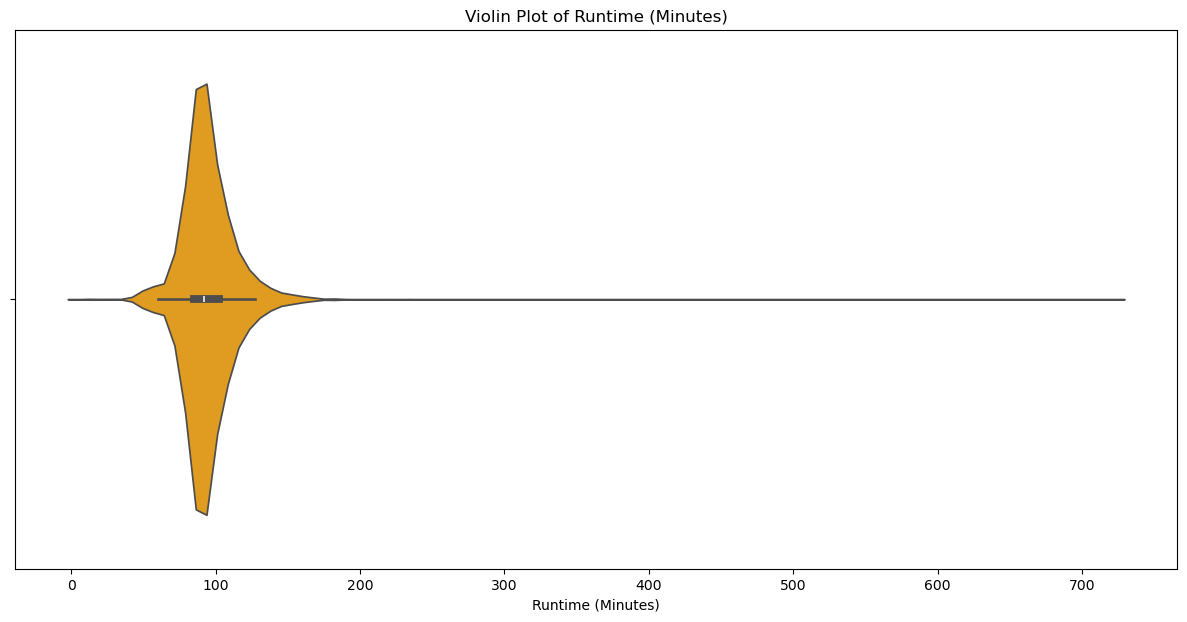

In [229]:
plt.figure(figsize=(15,7))
sns.violinplot(x=df['runtime_minutes'], color='orange')
plt.title('Violin Plot of Runtime (Minutes)')
plt.xlabel('Runtime (Minutes)')
plt.show()


## Genre Analysis

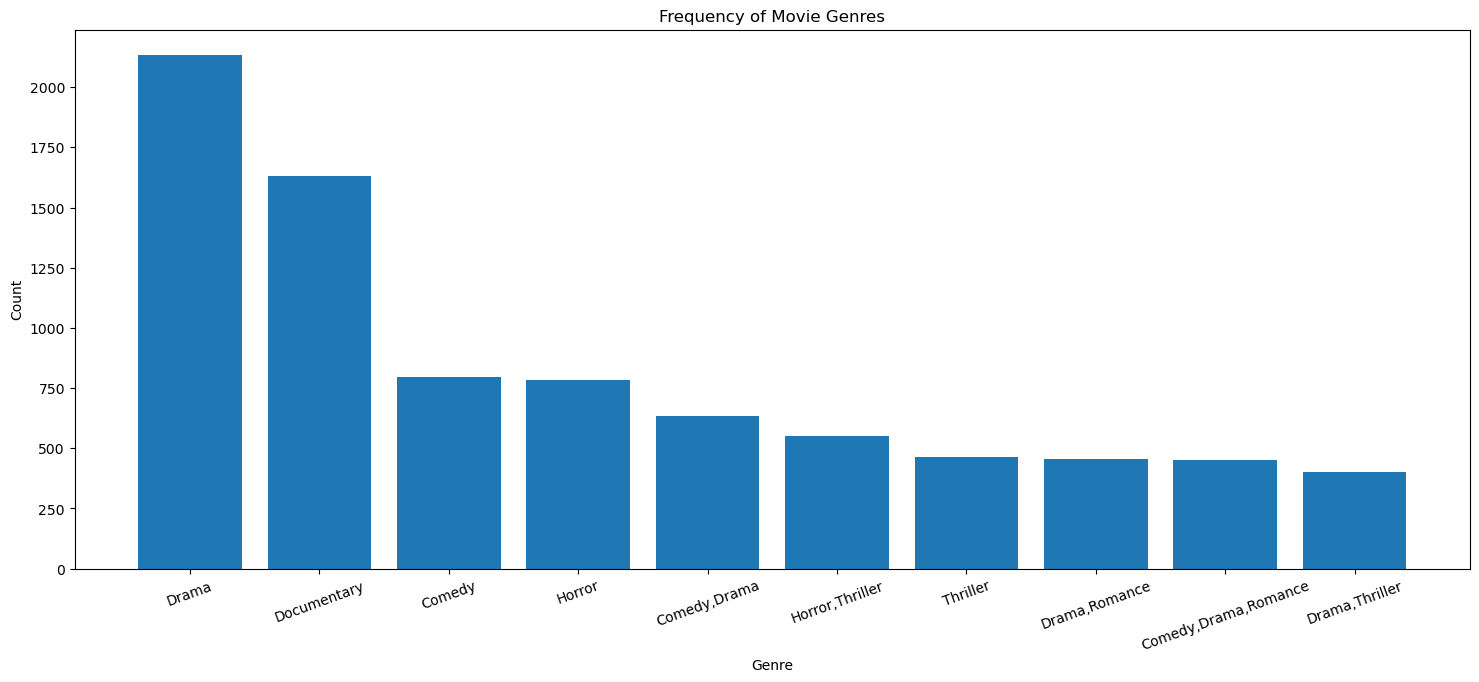

In [230]:
movie_genres = df['genres'].value_counts().reset_index(name='count')[:10]
movie_genres
plt.figure(figsize=(18,7))
plt.bar( movie_genres['genres'],movie_genres['count'] )
plt.title('Frequency of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=20)

plt.show()

### Observations 
- From the above bar plot we can deduce that drama and documentary in movie genres are the most liked and watched. Hence would be most appropriate genres to focus on while starting out.

### Genre split 

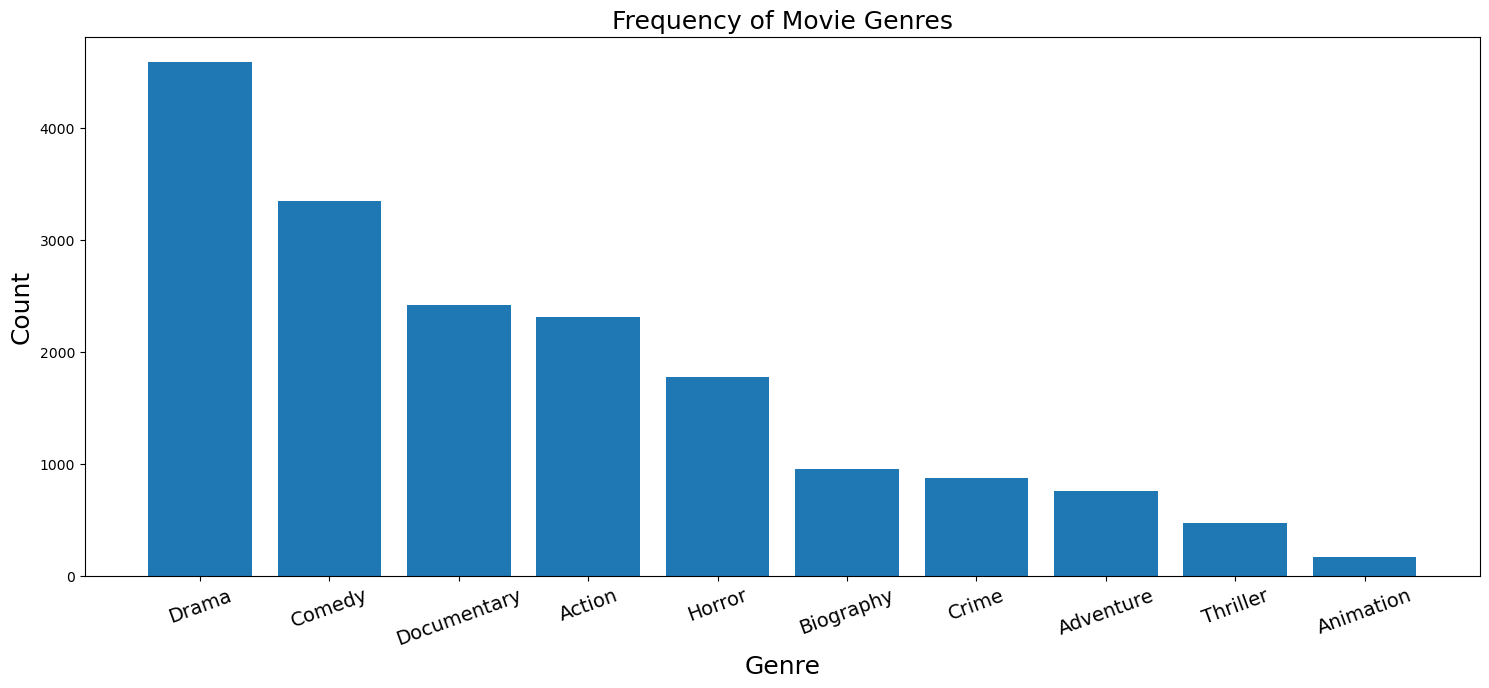

In [231]:
movie_genres = df['genre_1'].value_counts().reset_index(name='count')[:10]
movie_genres
plt.figure(figsize=(18,7))
plt.bar( movie_genres['genre_1'],movie_genres['count'] )
plt.title('Frequency of Movie Genres', fontsize=18)
plt.xlabel('Genre', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(rotation=20, fontsize=14)

plt.show()

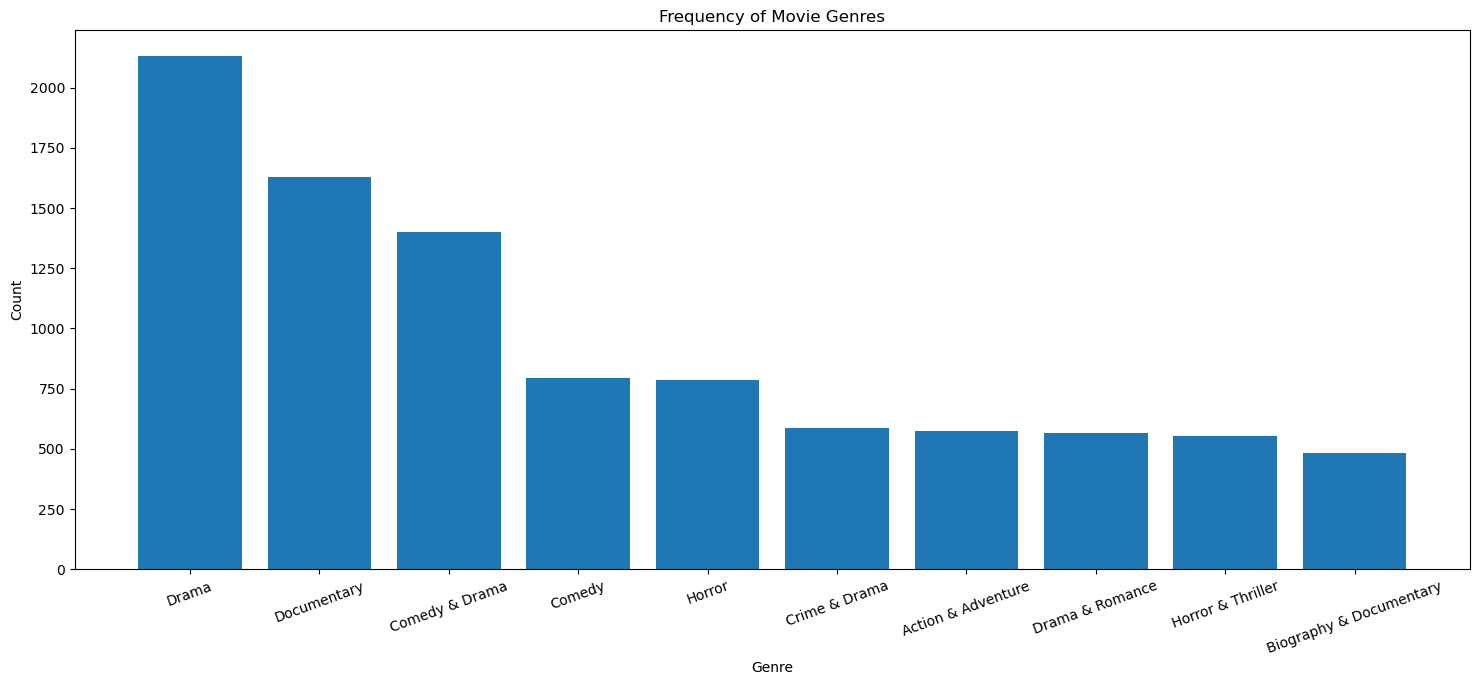

In [232]:
movie_genres = df['genre_combined'].value_counts().reset_index(name='count')[:10]
movie_genres
plt.figure(figsize=(18,7))
plt.bar( movie_genres['genre_combined'],movie_genres['count'] )
plt.title('Frequency of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=20)

plt.show()

### Average Rating 

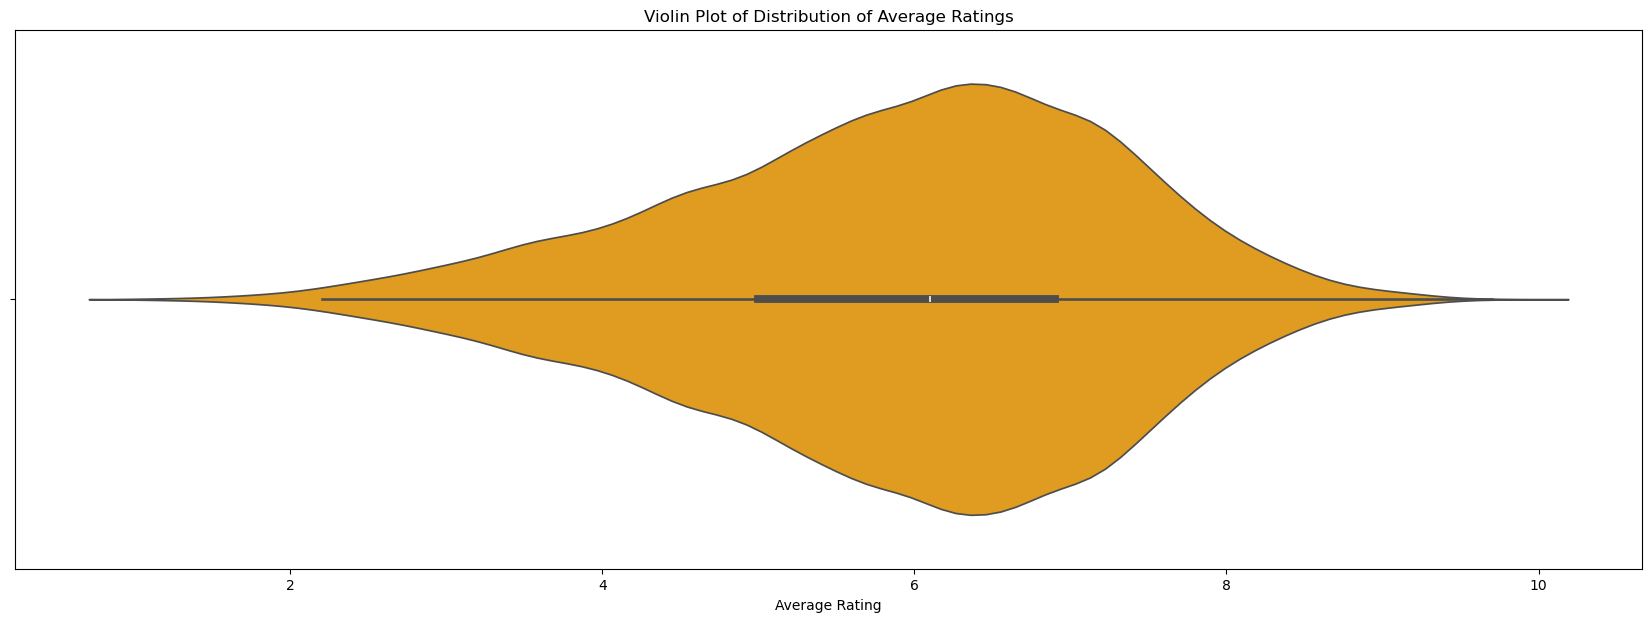

In [233]:
plt.figure(figsize=(21,7))
sns.violinplot(x=df['averagerating'], color='orange')
plt.title('Violin Plot of Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.show()


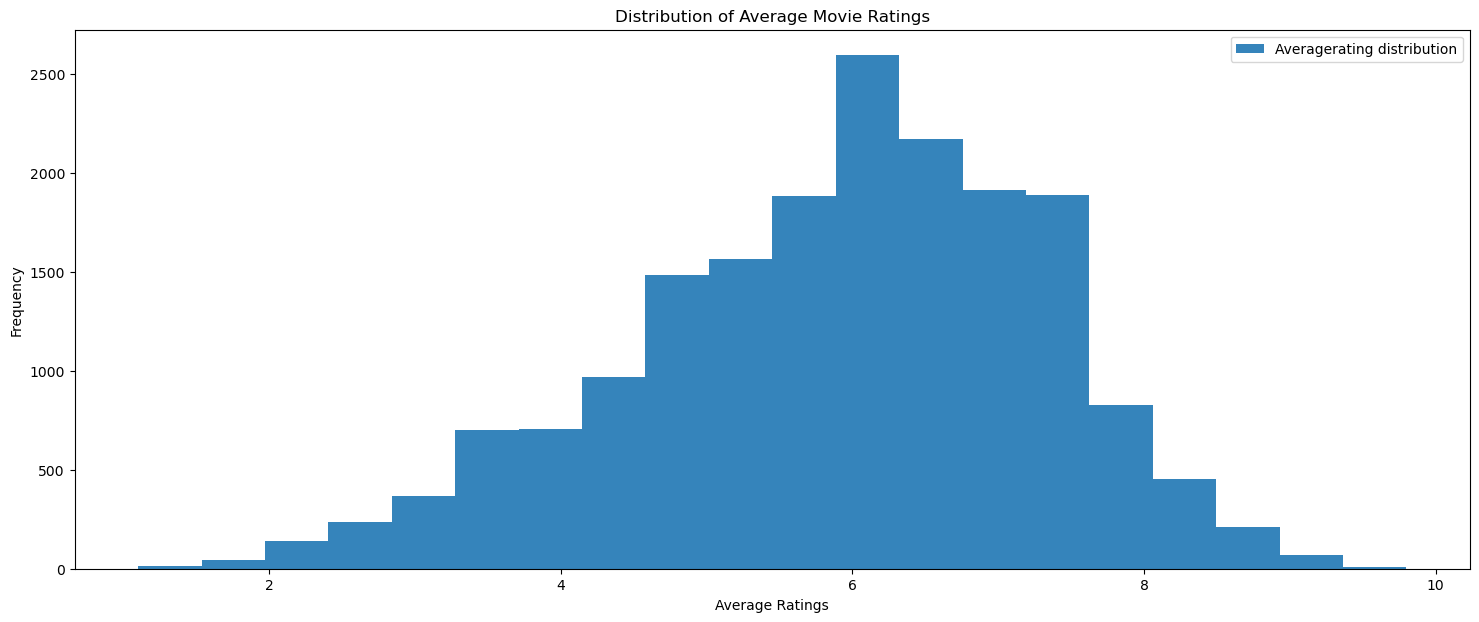

In [234]:
# Set the figure size before plotting
plt.figure(figsize=(18,7))

# Plot the histogram and set the label directly
plt.hist(df['averagerating'], bins=20, alpha=0.9,  label='Averagerating distribution')

# Set labels and title
plt.title('Distribution of Average Movie Ratings')
plt.xlabel('Average Ratings')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()


## Adjusted movie rating 

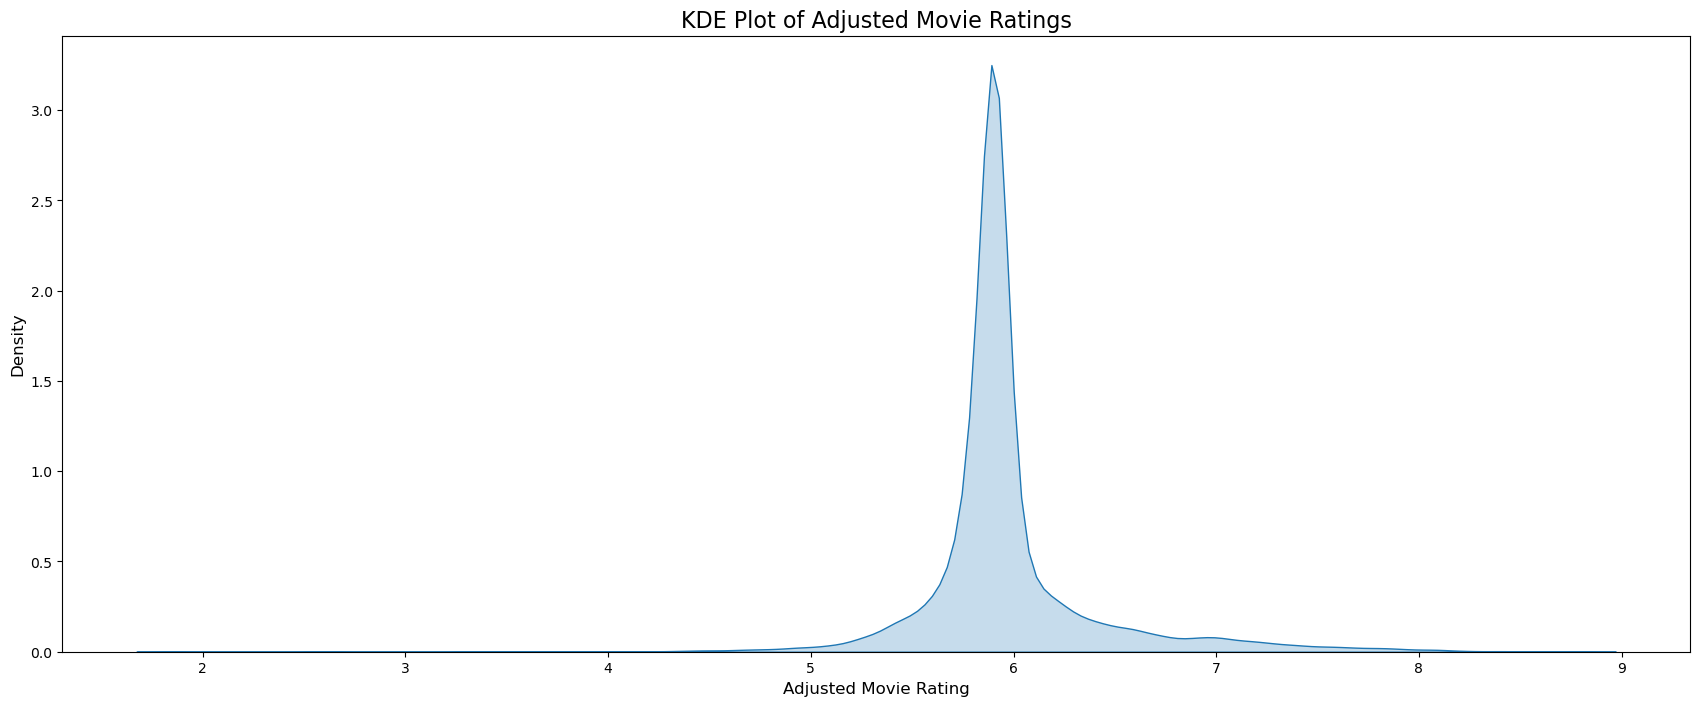

In [235]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(21, 8))
sns.kdeplot(data=df, x='adjusted_movie_rating', fill=True)

# Add labels and title
plt.title('KDE Plot of Adjusted Movie Ratings', fontsize=16)
plt.xlabel('Adjusted Movie Rating', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Show the plot
plt.show()

### Bar plot for movie_rating

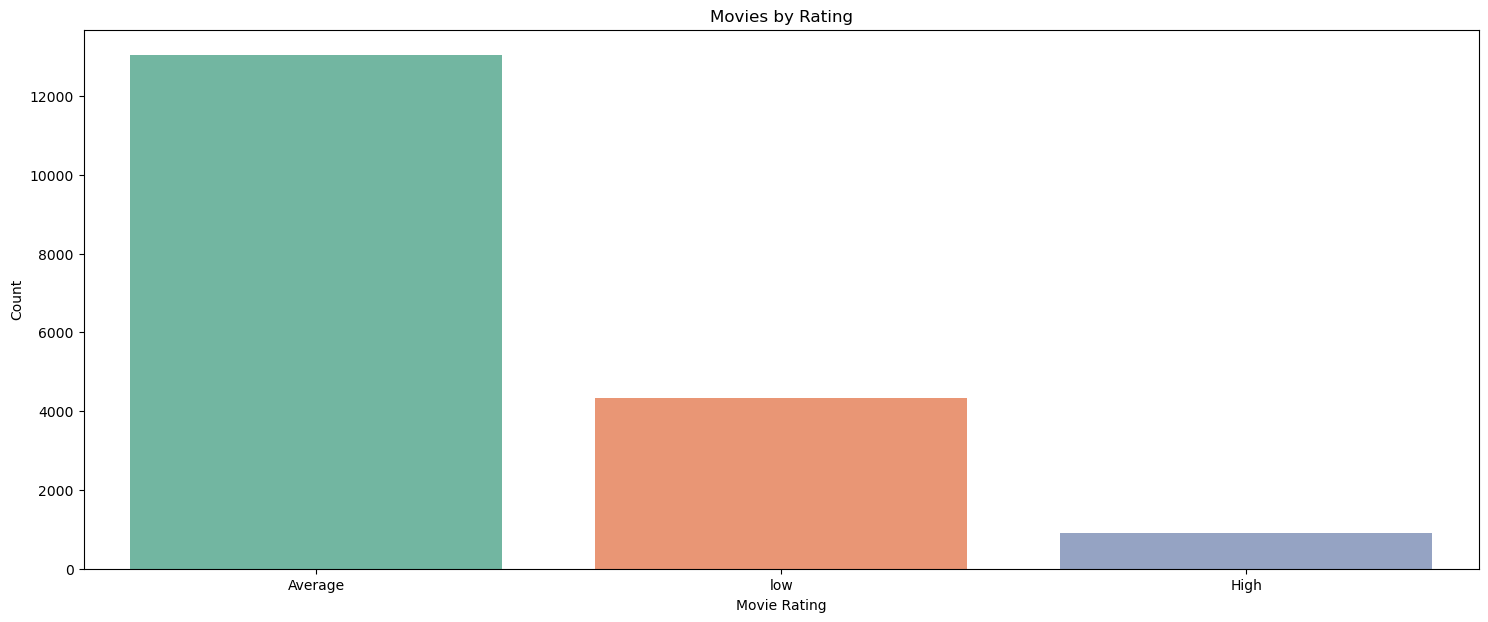

In [236]:
# Using a predefined color palette
plt.figure(figsize=(18,7))
sns.countplot(x='movie_rating', data=df, order=df['movie_rating'].value_counts().index, 
              palette='Set2', hue='movie_rating')

plt.title('Movies by Rating')
plt.xlabel('Movie Rating')
plt.ylabel('Count')
plt.show()

#### Observation
- From the above we can see that most movies have an average rating 

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18268 entries, 2 to 75816
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     18268 non-null  object        
 1   title                  18268 non-null  object        
 2   original_title         18268 non-null  object        
 3   start_year             18268 non-null  int64         
 4   runtime_minutes        18268 non-null  float64       
 5   genres                 18268 non-null  object        
 6   averagerating          18268 non-null  float64       
 7   numvotes               18268 non-null  int64         
 8   release_date           18268 non-null  datetime64[ns]
 9   movie_age              18268 non-null  object        
 10  movie_length           18268 non-null  object        
 11  adjusted_movie_rating  18268 non-null  float64       
 12  title_similarity       18268 non-null  int64         
 13  month 

## Movie length 


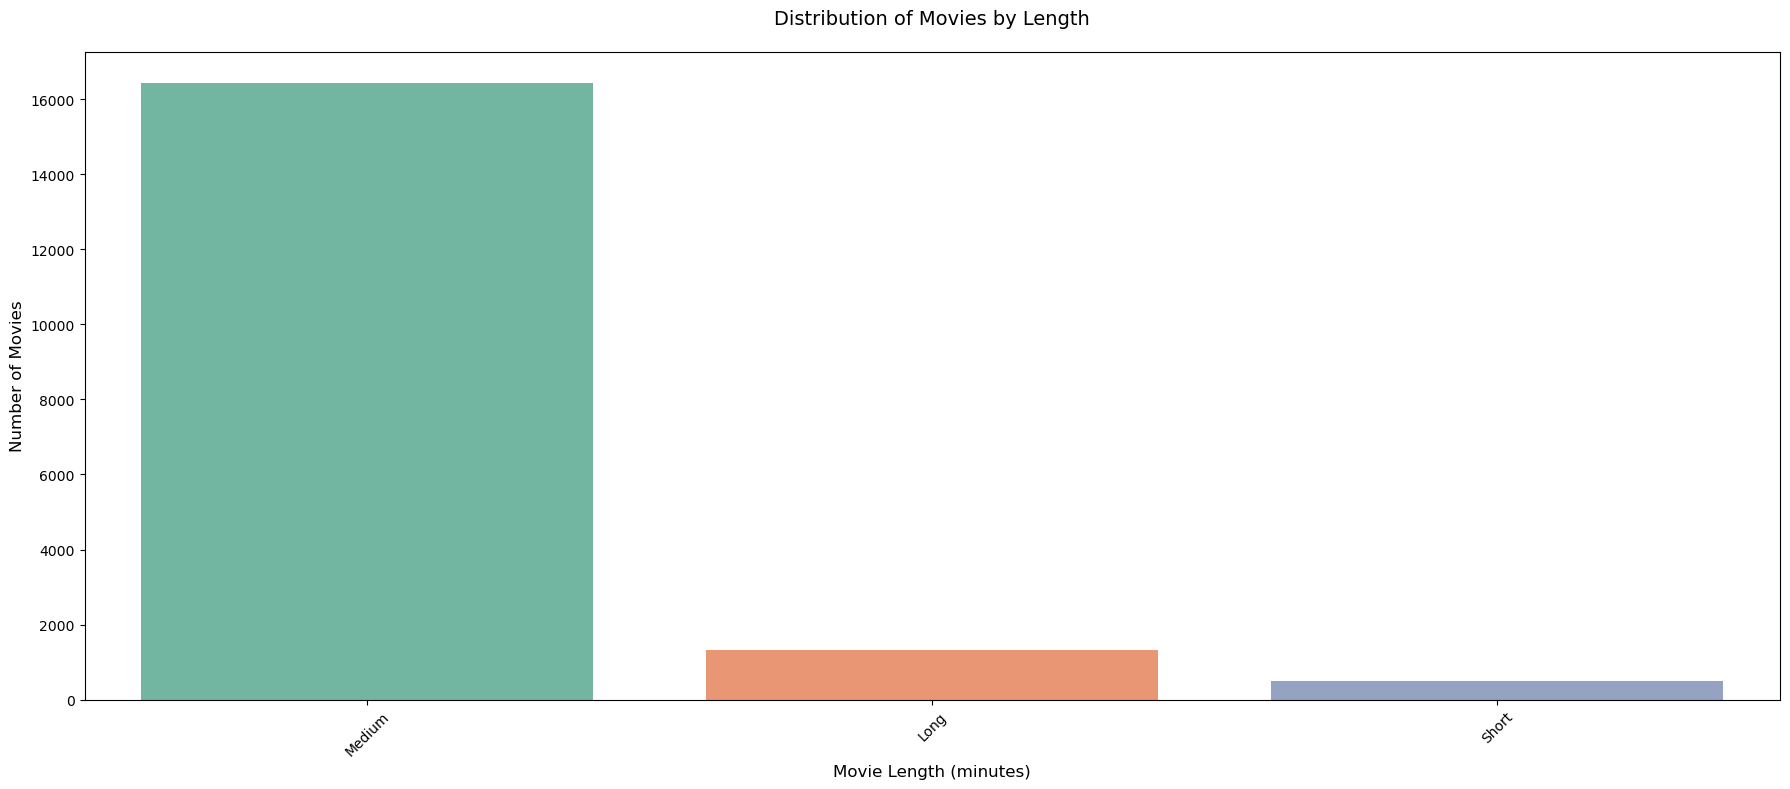

In [238]:
# Calculate the value counts and reset index
movie_length = df['movie_length'].value_counts().reset_index(name='count')

# Create figure with larger size
plt.figure(figsize=(18, 8))

# Create Bar Plot using modern color palette
sns.barplot(
    data=movie_length,
    x='movie_length',
    y='count',
    palette='Set2',
    hue= 'movie_length',
)

# Customize the plot
plt.title('Distribution of Movies by Length', pad=20, fontsize=14)
plt.xlabel('Movie Length (minutes)', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)


# Tight layout to prevent label cutoff
plt.tight_layout()
plt.show()


## Season with most movies

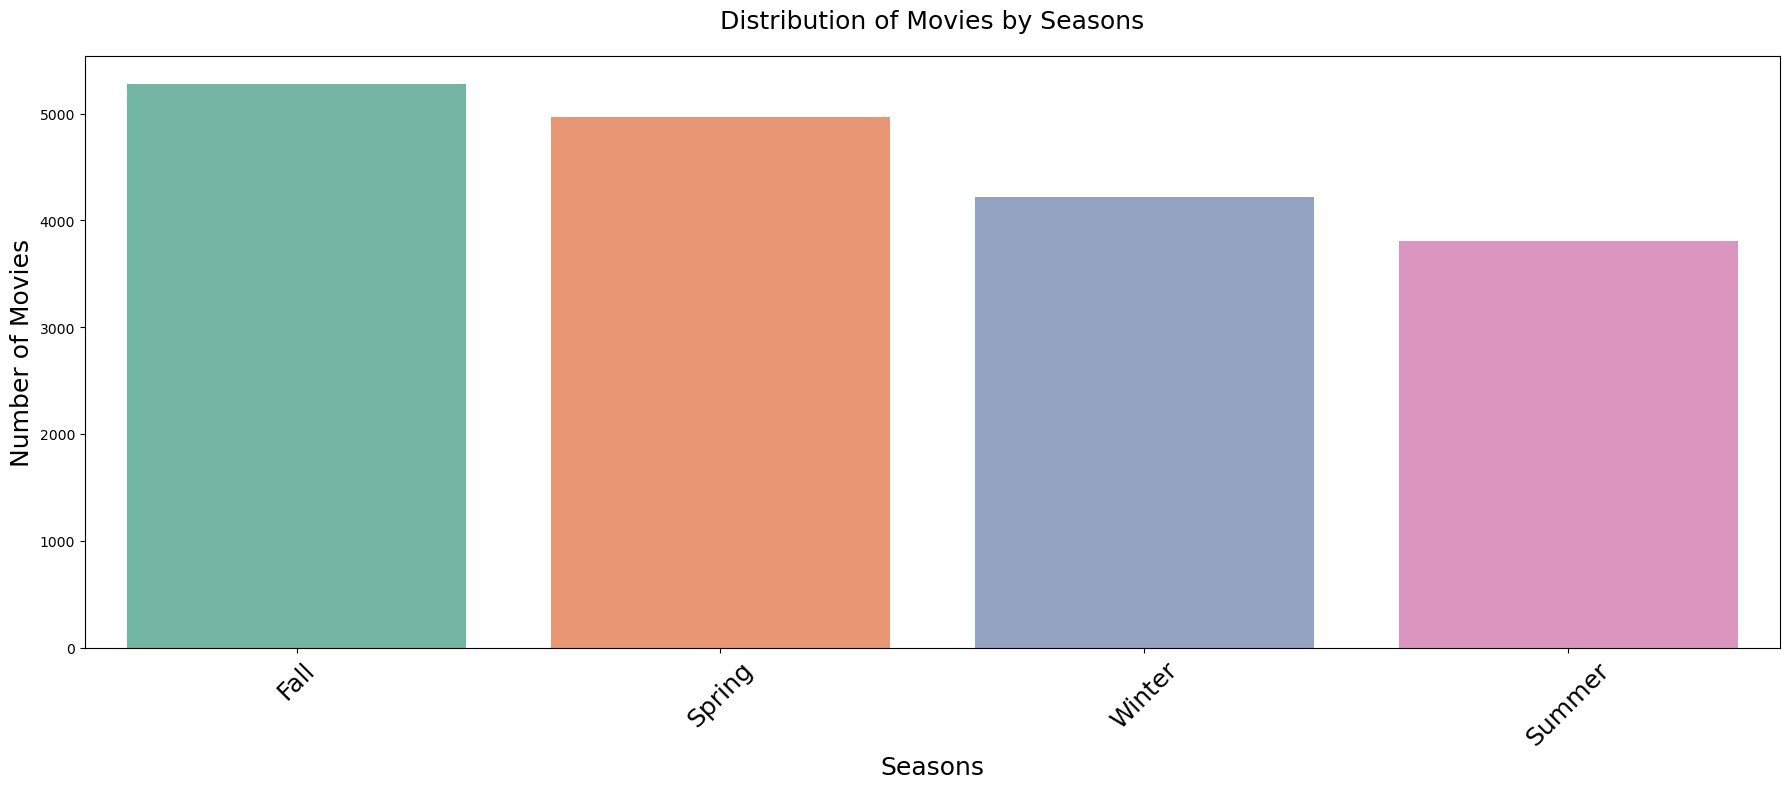

In [239]:
# Calculate the value counts and reset index
movie_length = df['season'].value_counts().reset_index(name='count')

# Create figure with larger size
plt.figure(figsize=(18, 8))

# Create Bar Plot using modern color palette
sns.barplot(
    data=movie_length,
    x='season',
    y='count',
    palette='Set2',
    hue= 'season',
)

# Customize the plot
plt.title('Distribution of Movies by Seasons', pad=20, fontsize=18)
plt.xlabel('Seasons', fontsize=18)
plt.ylabel('Number of Movies', fontsize=18)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=18)


# Tight layout to prevent label cutoff
plt.tight_layout()
plt.show()


## Word Cloud 

In [240]:
#! pip install WordCloud

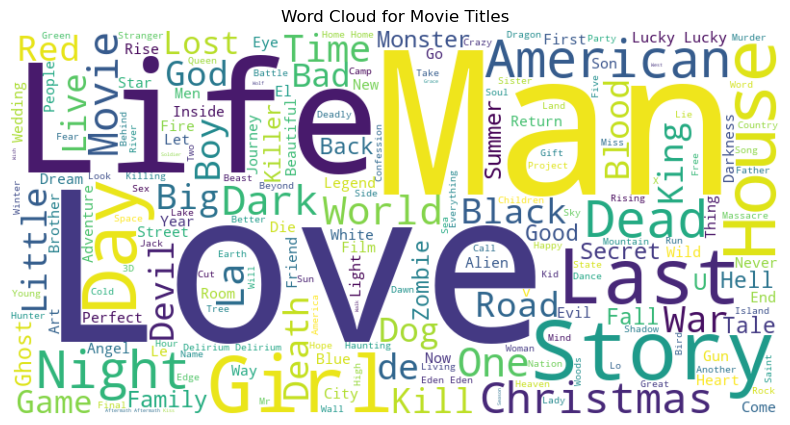

In [241]:
from wordcloud import WordCloud
# Combine all titles into a single string
all_titles = ' '.join(df['title'] + ' ' + df['original_title'])

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

# Display Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Movie Titles')
plt.show()


### Movie Rating 

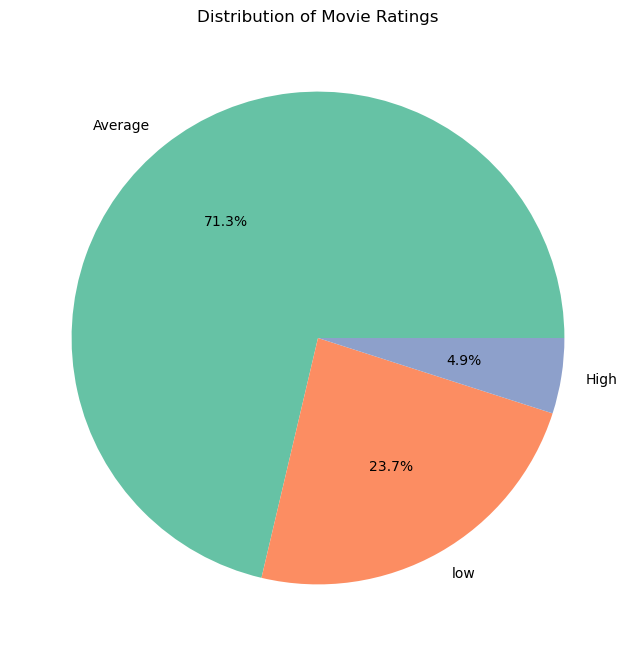

In [242]:
# Pie chart for movie_rating
# Create figure with larger size
plt.figure(figsize=(20, 6))
df['movie_rating'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8), colors=sns.color_palette('Set2'))
plt.title('Distribution of Movie Ratings')
plt.ylabel('')
plt.show()

# Bivariate Analysis

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18268 entries, 2 to 75816
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     18268 non-null  object        
 1   title                  18268 non-null  object        
 2   original_title         18268 non-null  object        
 3   start_year             18268 non-null  int64         
 4   runtime_minutes        18268 non-null  float64       
 5   genres                 18268 non-null  object        
 6   averagerating          18268 non-null  float64       
 7   numvotes               18268 non-null  int64         
 8   release_date           18268 non-null  datetime64[ns]
 9   movie_age              18268 non-null  object        
 10  movie_length           18268 non-null  object        
 11  adjusted_movie_rating  18268 non-null  float64       
 12  title_similarity       18268 non-null  int64         
 13  month 

## Correlation between numeric columns

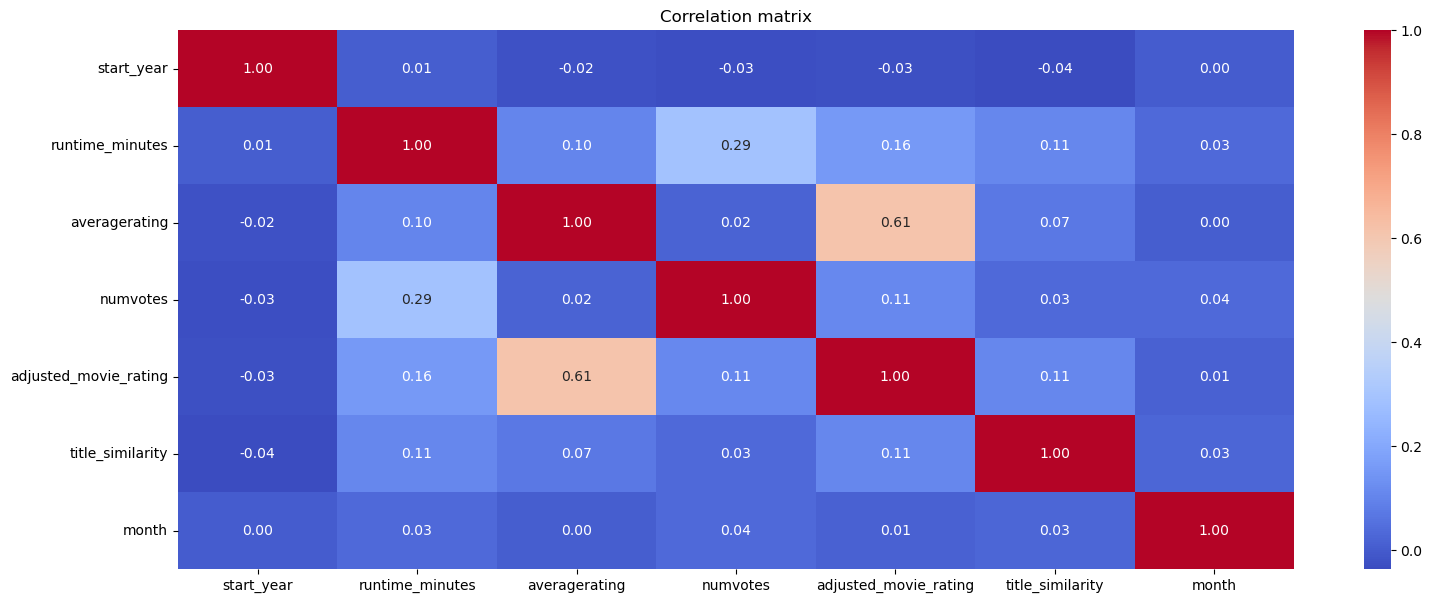

In [244]:
# Only select numeric columns 
numeric_columns = df.select_dtypes(include=['number']).columns[:]

# Correlation matrix 
corr_matrix = df[numeric_columns].corr(method='kendall')

# Plot 
plt.figure(figsize=(18, 7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

In [245]:
# # Checking the relationship between the different columns present

# # Select only numeric columns
# numeric_data = df.select_dtypes(include=['number'])

# sns.pairplot(numeric_data)
# plt.show()


### Relation between number of votes and weighted rating 

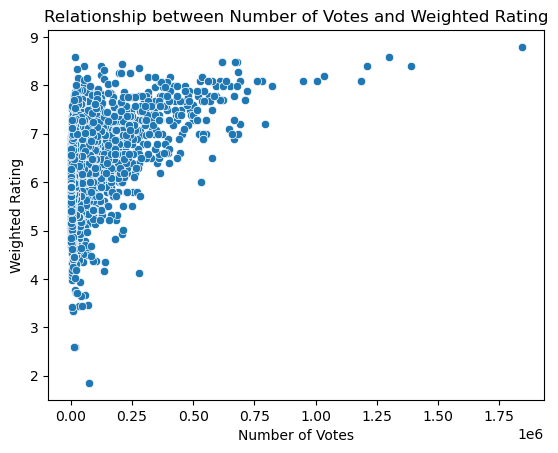

Correlation between number of votes and weighted rating: 0.498810801949594


In [246]:
# Scatter plot
sns.scatterplot(x='numvotes', y='adjusted_movie_rating', data=df)
plt.title('Relationship between Number of Votes and Weighted Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Weighted Rating')
plt.show()

# Correlation coefficient
correlation = df['numvotes'].corr(df['adjusted_movie_rating'])
print(f"Correlation between number of votes and weighted rating: {correlation}")

## genres vs runtime 

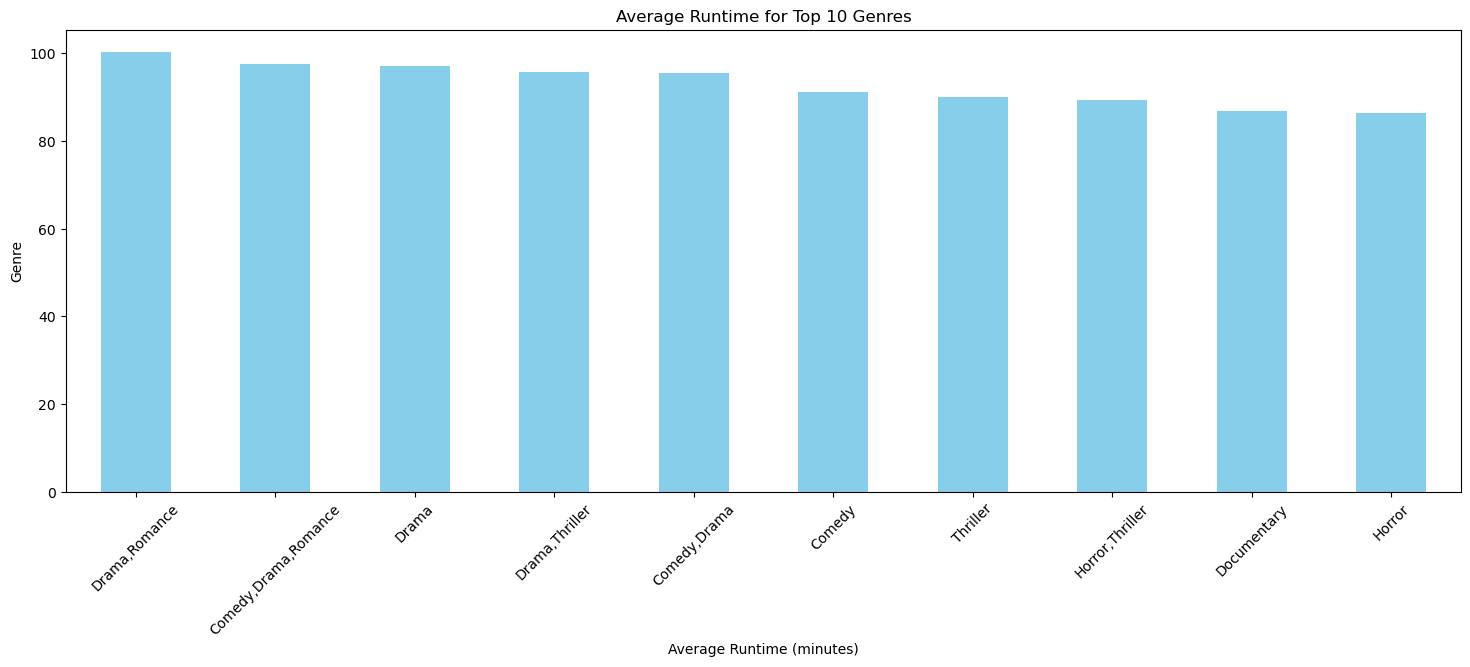

In [341]:
# Assuming the DataFrame is named df
# Step 1: Find the top 10 genres
top_genres = df['genres'].value_counts().head(10).index

# Step 2: Filter the dataset to include only top 10 genres
top_genres_df = df[df['genres'].isin(top_genres)]

# Step 3: Group by genre and calculate average runtime
avg_runtime_genre = top_genres_df.groupby('genres')['runtime_minutes'].mean().sort_values(ascending=False)

# Step 4: Plot the average runtime for the top 10 genres
plt.figure(figsize=(18, 6))
avg_runtime_genre.plot(kind='bar', color='skyblue')
plt.title('Average Runtime for Top 10 Genres')
plt.xlabel('Average Runtime (minutes)')
plt.ylabel('Genre')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

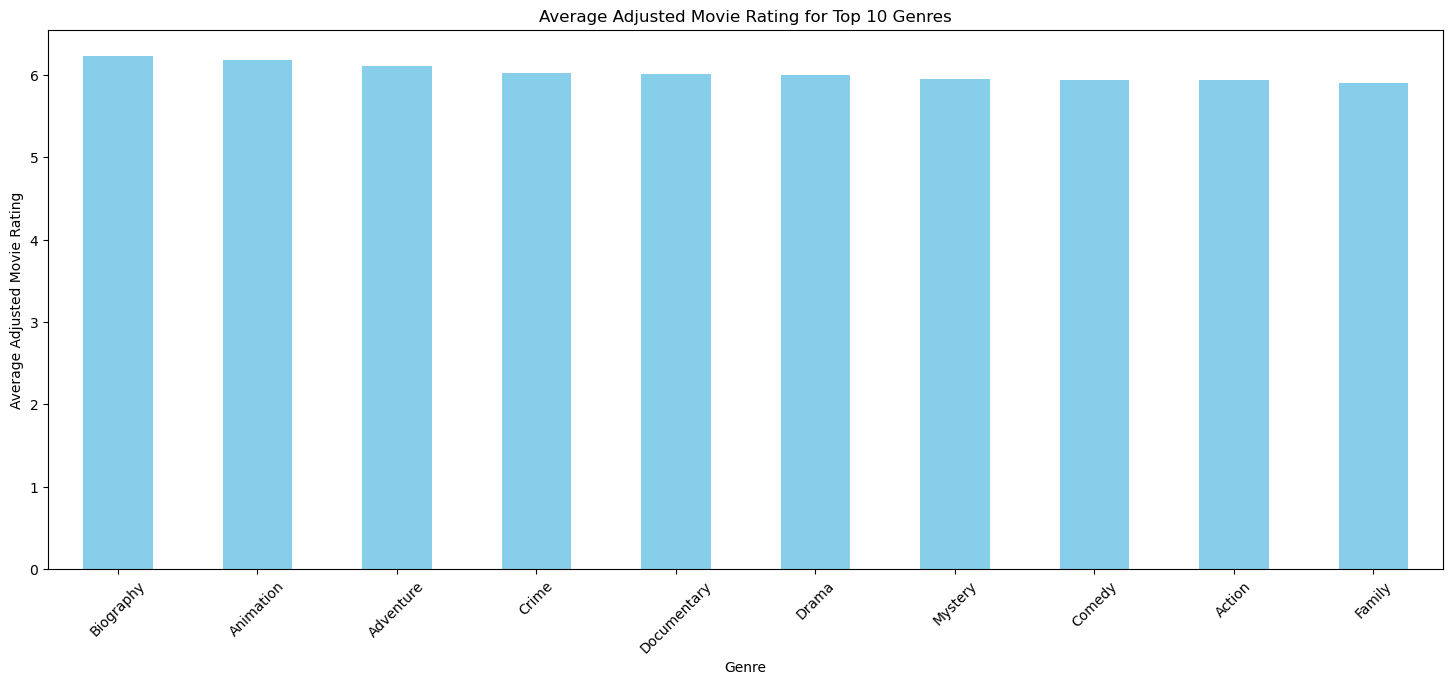

In [249]:
# Step 1: Find the top 15 genres
top_genres = df['genre_1'].value_counts().head(15).index

# Step 2: Filter the DataFrame to only include rows with the top genres
top_genres_df = df[df['genre_1'].isin(top_genres)]

# Step 3: Group by genre and calculate average adjusted movie rating
genre_avg_adjusted_rating = top_genres_df.groupby(
    'genre_1')['adjusted_movie_rating'].mean().sort_values(ascending=False).head(10)

# Step 4: Plot the average adjusted movie rating for the top 10 genres
plt.figure(figsize=(18, 7))
genre_avg_adjusted_rating.plot(kind='bar', color='skyblue')
plt.title('Average Adjusted Movie Rating for Top 10 Genres')
plt.ylabel('Average Adjusted Movie Rating')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.show()


In [250]:
### Combined 

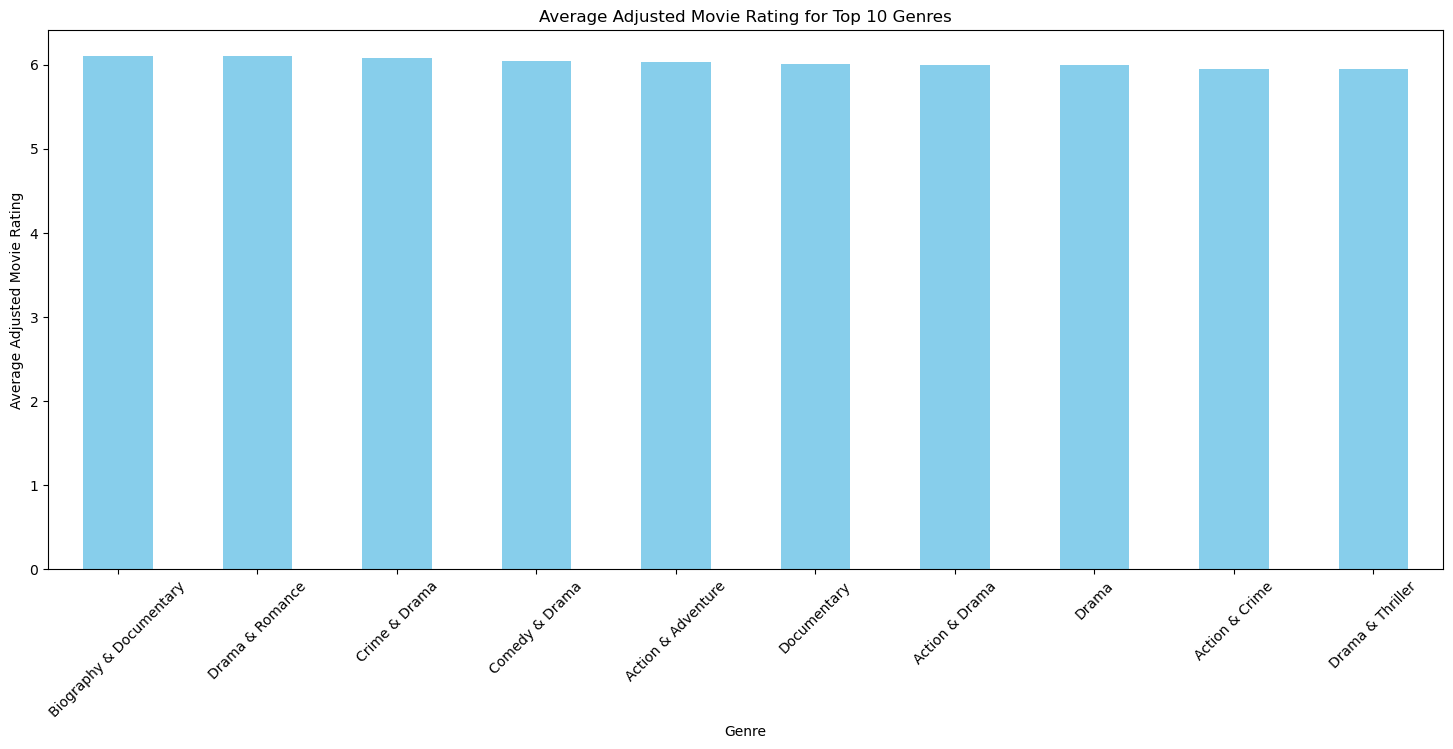

In [251]:
# Step 1: Find the top 15 genres
top_genres = df['genre_combined'].value_counts().head(15).index

# Step 2: Filter the DataFrame to only include rows with the top genres
top_genres_df = df[df['genre_combined'].isin(top_genres)]

# Step 3: Group by genre and calculate average adjusted movie rating
genre_avg_adjusted_rating = top_genres_df.groupby(
    'genre_combined')['adjusted_movie_rating'].mean().sort_values(ascending=False).head(10)

# Step 4: Plot the average adjusted movie rating for the top 10 genres
plt.figure(figsize=(18, 7))
genre_avg_adjusted_rating.plot(kind='bar', color='skyblue')
plt.title('Average Adjusted Movie Rating for Top 10 Genres')
plt.ylabel('Average Adjusted Movie Rating')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.show()


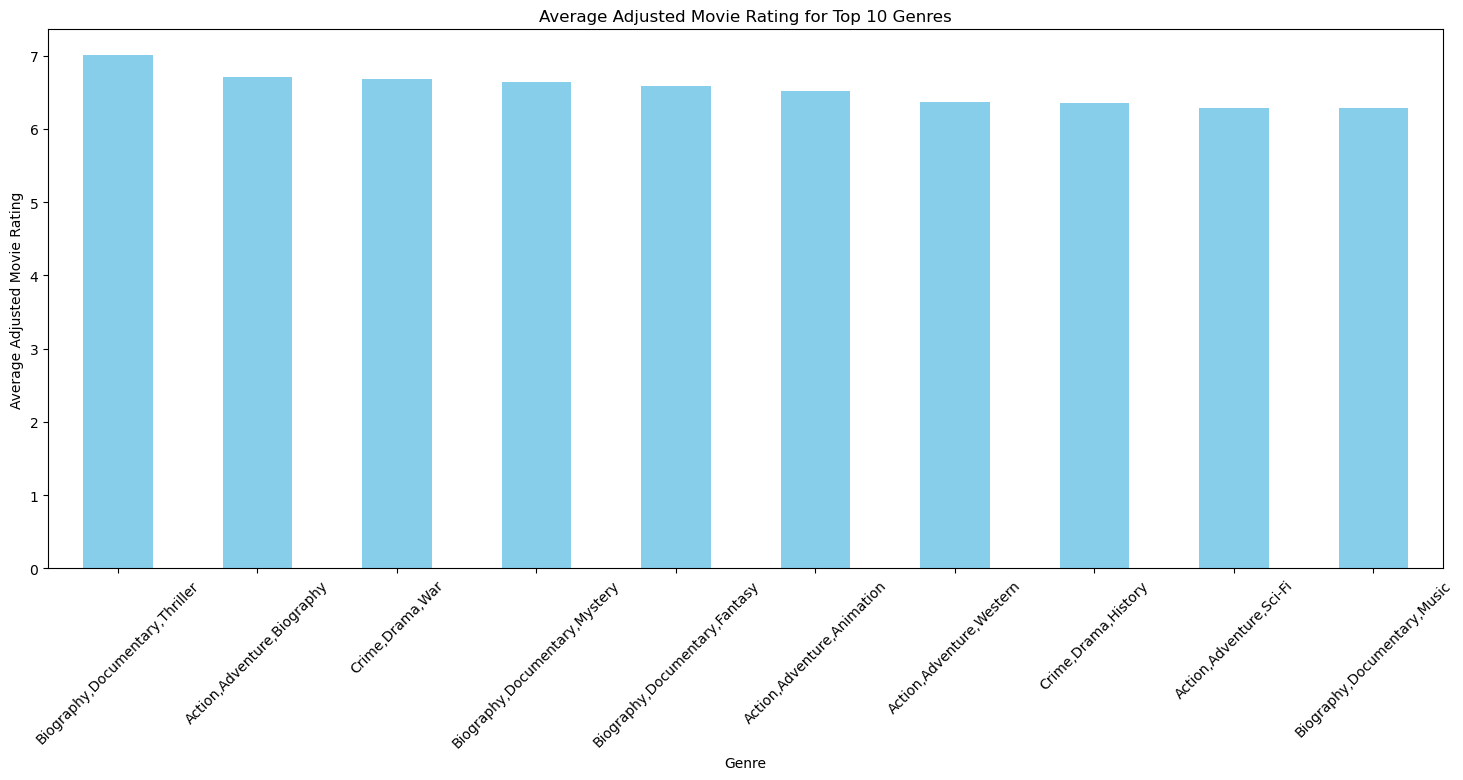

In [340]:
# Step 2: Group by genre and calculate average adjusted movie rating
genre_avg_adjusted_rating = top_genres_df.groupby(
        'genres')['adjusted_movie_rating'].mean().sort_values(ascending=False)[:10]

# Step 3: Plot the average adjusted movie rating for the top 10 genres
plt.figure(figsize=(18, 7))
genre_avg_adjusted_rating.plot(kind='bar', color='skyblue')
plt.title('Average Adjusted Movie Rating for Top 10 Genres')
plt.ylabel('Average Adjusted Movie Rating')
plt.xlabel('Genre')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

Index(['Drama', 'Comedy', 'Documentary', 'Action', 'Horror', 'Biography',
       'Crime', 'Adventure', 'Thriller', 'Animation', 'Family', 'Sci-Fi',
       'Fantasy', 'Mystery', 'Romance'],
      dtype='object', name='genre_1')


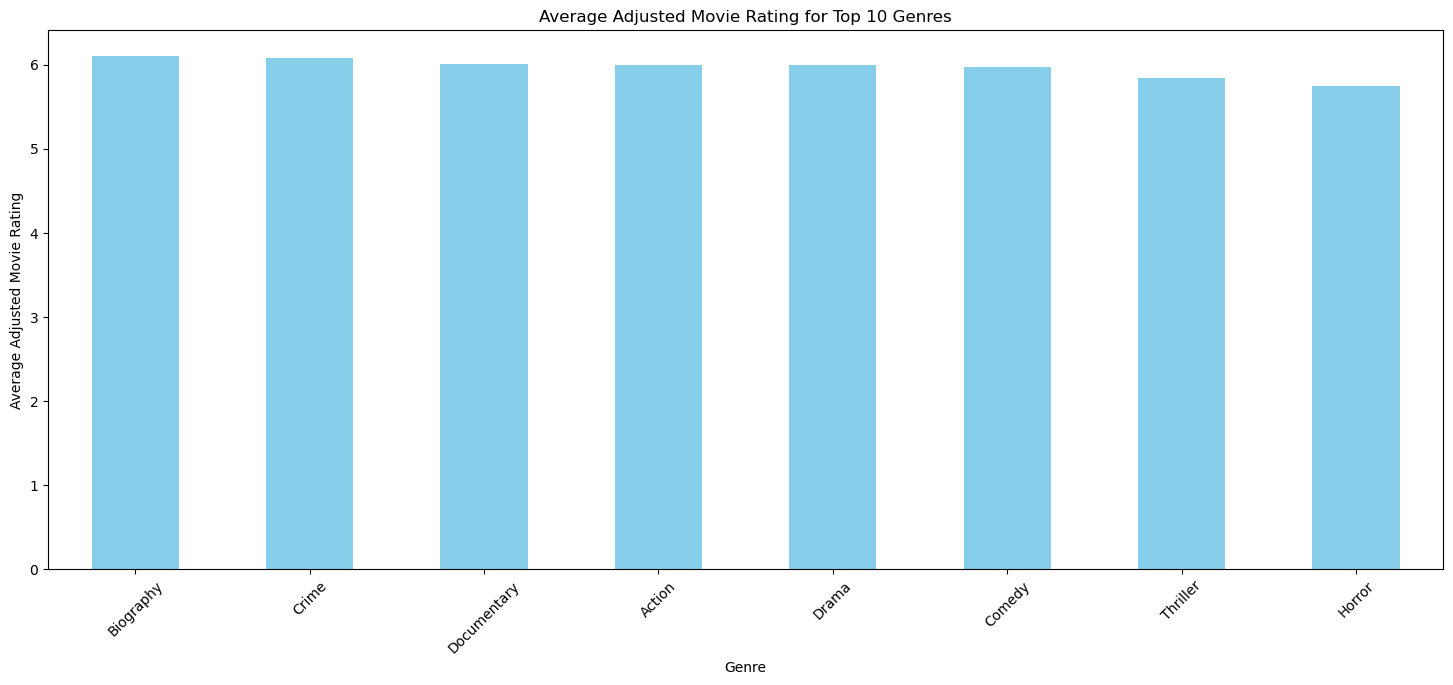

In [253]:
# Step 1: Find the top 10 genres
top_genres = df['genre_1'].value_counts().head(15).index
print(top_genres)

# Step 2: Group by genre and calculate average adjusted movie rating
genre_avg_adjusted_rating = top_genres_df.groupby(
        'genre_1')['adjusted_movie_rating'].mean().sort_values(ascending=False)[:10]

# Step 3: Plot the average adjusted movie rating for the top 10 genres
plt.figure(figsize=(18, 7))
genre_avg_adjusted_rating.plot(kind='bar', color='skyblue')
plt.title('Average Adjusted Movie Rating for Top 10 Genres')
plt.ylabel('Average Adjusted Movie Rating')
plt.xlabel('Genre')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()


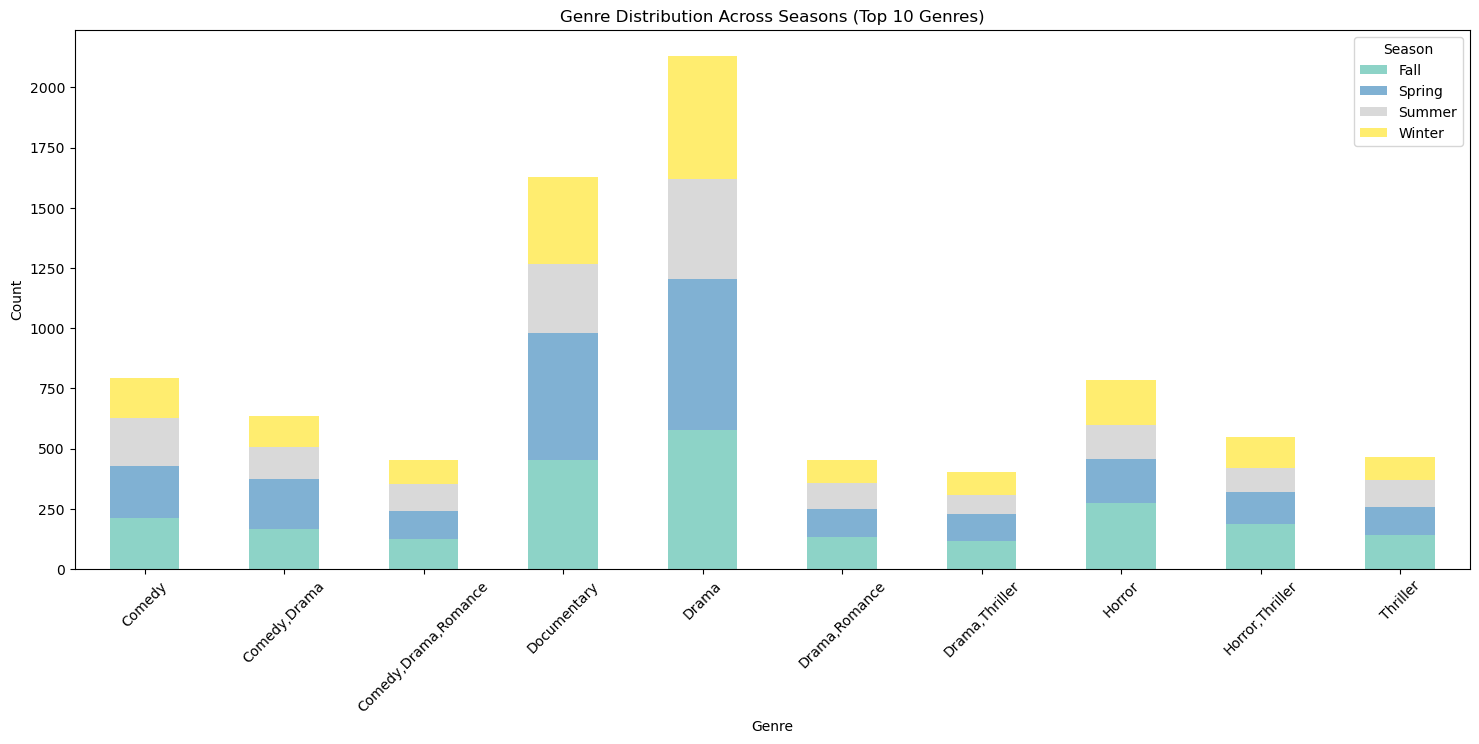

In [254]:
# Step 1: Find the top 10 genres
top_genres = df['genres'].value_counts().head(10).index

# Step 1: Filter the data to include only top 10 genres
top_genres_season_df = top_genres_df[top_genres_df['genres'].isin(top_genres)]

# Step 2: Group by genre and season, and count the occurrences
genre_season_counts = top_genres_season_df.groupby(['genres', 'season']).size().unstack(fill_value=0)

# Step 3: Plot the genre vs season using a stacked bar chart
genre_season_counts.plot(kind='bar', stacked=True, figsize=(18, 7), colormap='Set3')
plt.title('Genre Distribution Across Seasons (Top 10 Genres)')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Season')
plt.show()


## Split

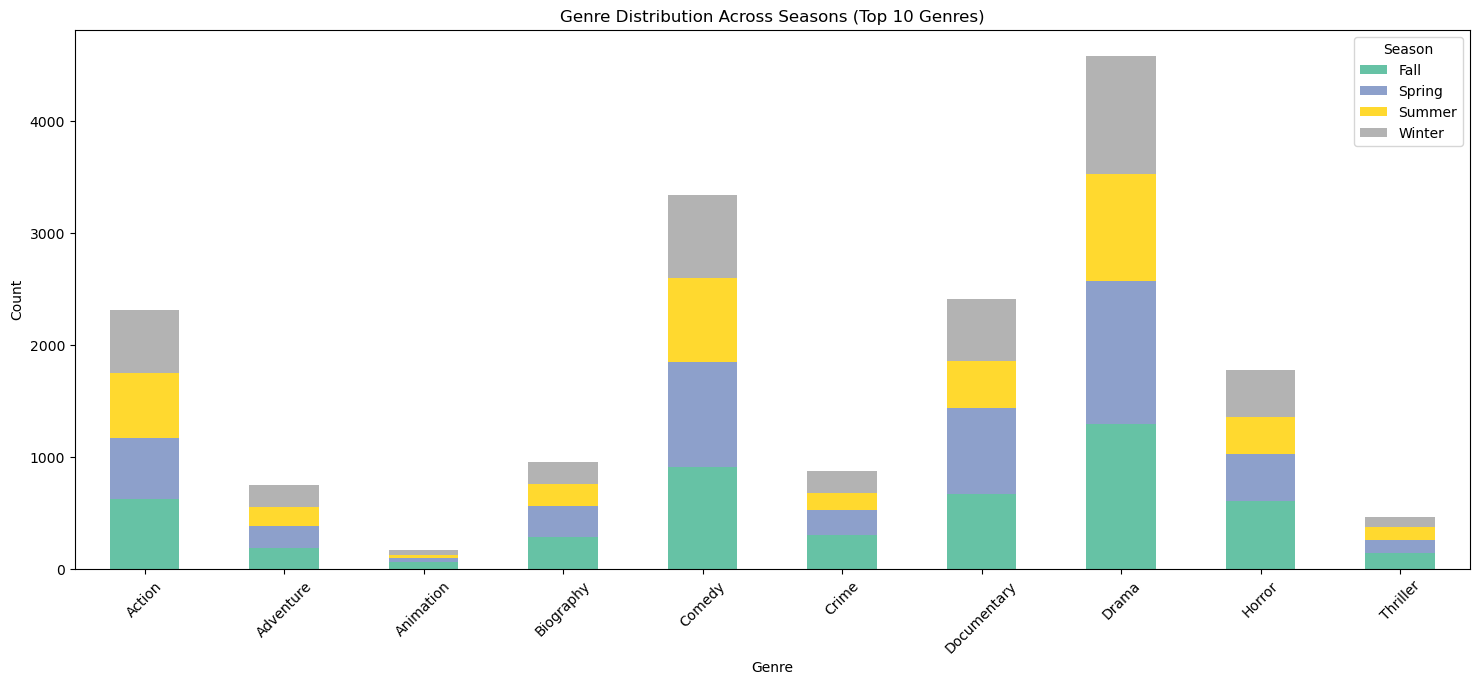

In [255]:
# Step 1: Find the top 10 genres instead of 15
top_10_genres = df['genre_1'].value_counts().head(10).index  # Only get top 10
top_genres_df = df[df['genre_1'].isin(top_10_genres)]  # Filter the DataFrame to only include top 10 genres

# Step 2: Group by genre and season, and count the occurrences
genre_season_counts = top_genres_df.groupby(['genre_1', 'season']).size().unstack(fill_value=0)

# Step 3: Plot the genre vs. season using a stacked bar chart
genre_season_counts.plot(kind='bar', stacked=True, figsize=(18, 7), colormap='Set2')
plt.title('Genre Distribution Across Seasons (Top 10 Genres)')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Season')
plt.show()


### Combined

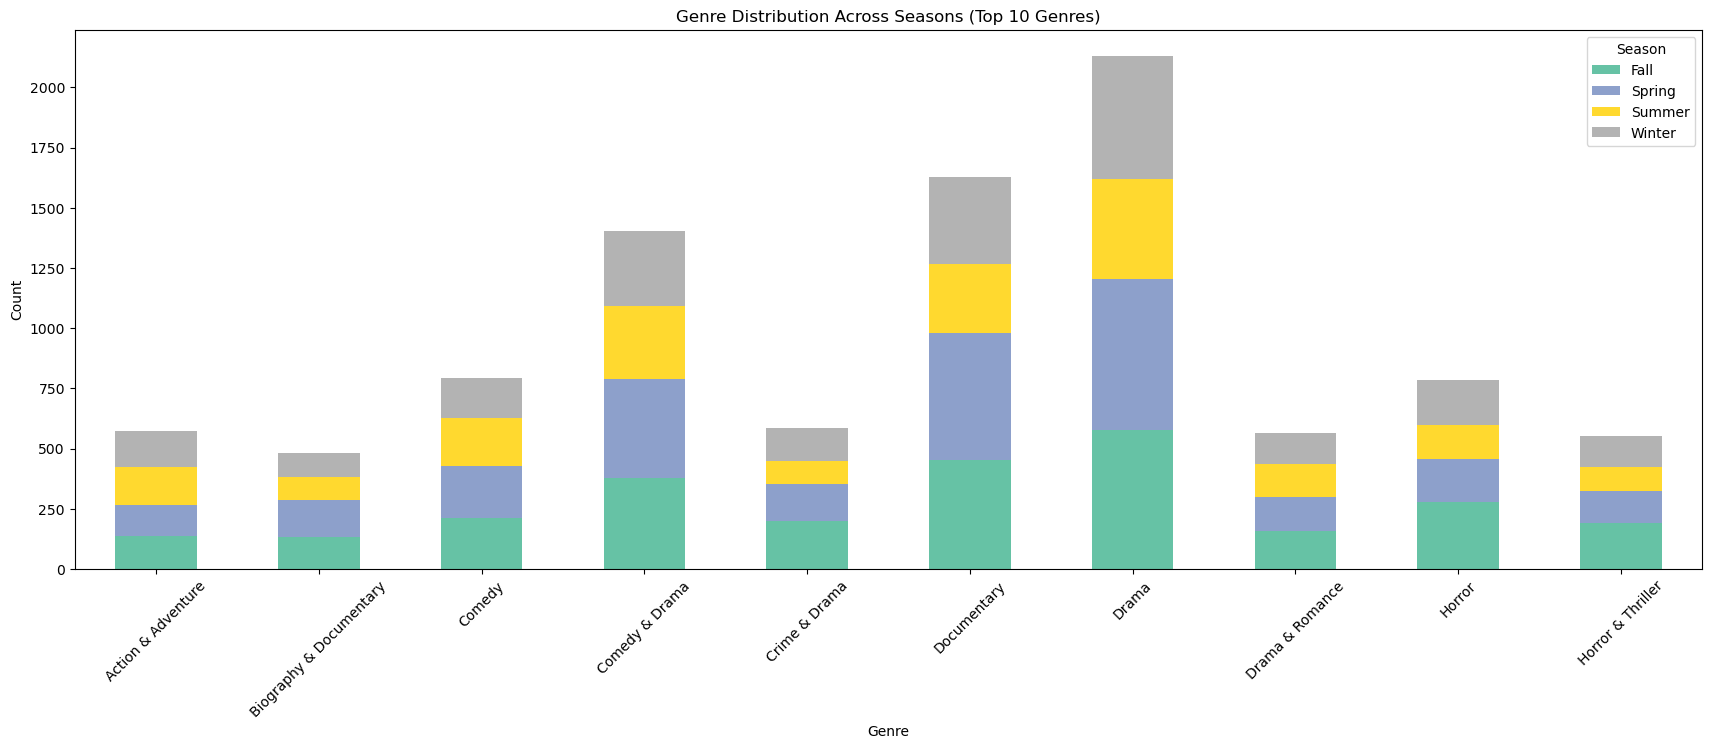

In [256]:
# Step 1: Find the top 10 genres instead of 15
top_10_genres = df['genre_combined'].value_counts().head(10).index  # Only get top 10
top_genres_df = df[df['genre_combined'].isin(top_10_genres)]  # Filter the DataFrame to only include top 10 genres

# Step 2: Group by genre and season, and count the occurrences
genre_season_counts = top_genres_df.groupby(['genre_combined', 'season']).size().unstack(fill_value=0)

# Step 3: Plot the genre vs. season using a stacked bar chart
genre_season_counts.plot(kind='bar', stacked=True, figsize=(21, 7), colormap='Set2')
plt.title('Genre Distribution Across Seasons (Top 10 Genres)')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Season')
plt.show()


## Time series 

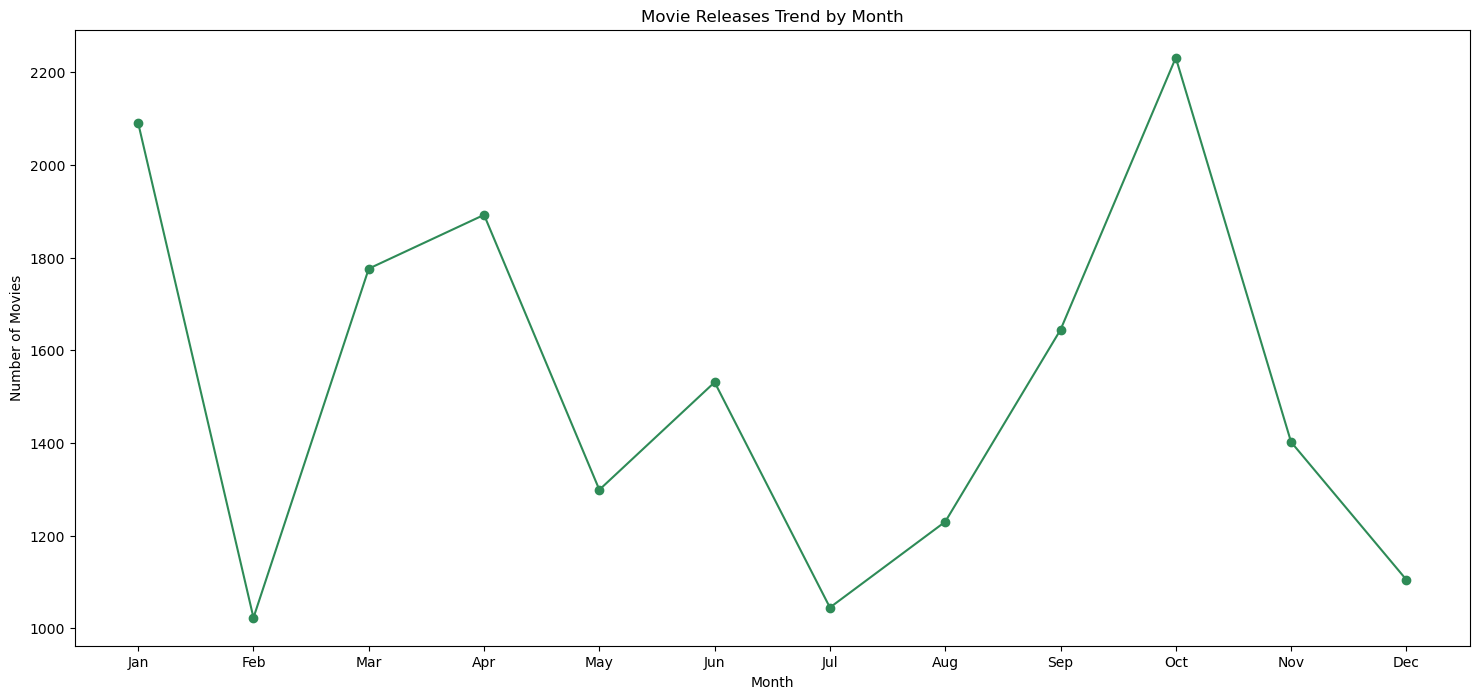

In [257]:
# Analysis 1: Title (sum) vs Month
# Step 1: Extract the month from the release_date
df['month'] = df['release_date'].dt.month

# Step 2: Group by month and count the number of movies
monthly_movie_count = df.groupby('month').size()

# Step 3: Plot the trend of movie releases per month
plt.figure(figsize=(18, 8))
monthly_movie_count.plot(kind='line', marker='o', color='seagreen')
plt.title('Movie Releases Trend by Month')
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

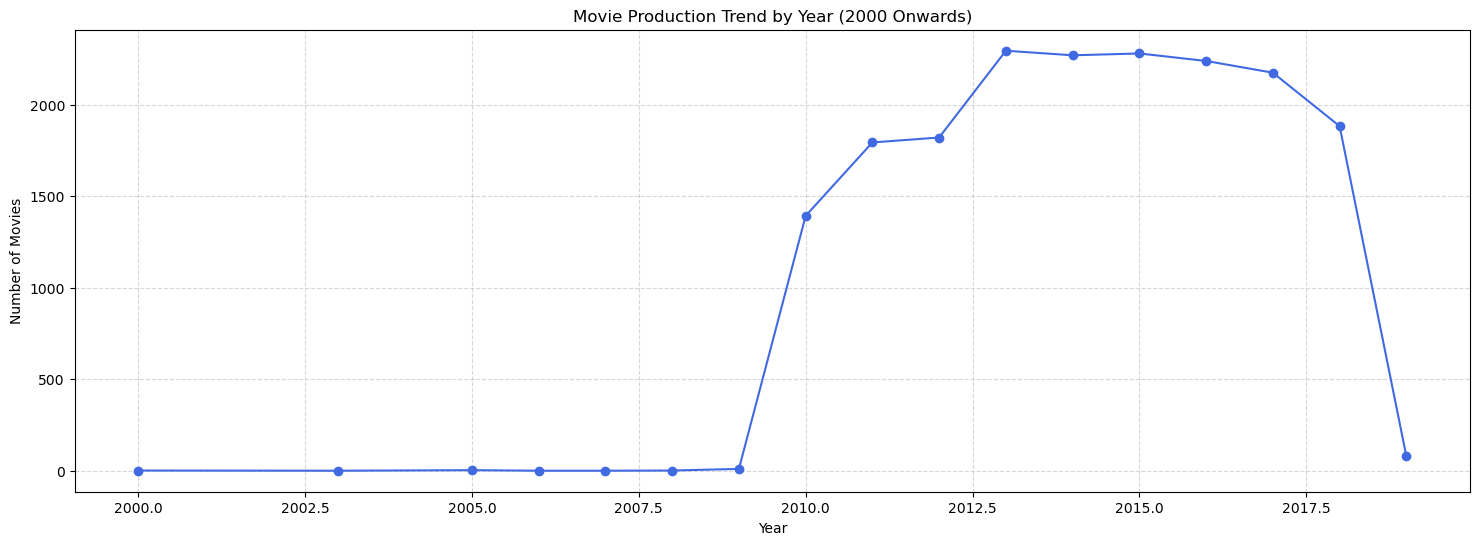

In [258]:
# Step 1: Extract the year from the release_date
df['year'] = df['release_date'].dt.year.astype(int) 

# Step 2: Filter the data to include only years from 2000 onwards
df_filtered = df[df['year'] >= 2000]

# Step 3: Group by year and count the number of movies
yearly_movie_count = df_filtered.groupby('year').size()

# Step 4: Plot the trend of movie releases per year starting from 2000
plt.figure(figsize=(18, 6))
yearly_movie_count.plot(kind='line', marker='o', color='royalblue')
plt.title('Movie Production Trend by Year (2000 Onwards)')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True, linestyle='--', alpha=0.5)  # Optional: Add gridlines for better readability
plt.show()

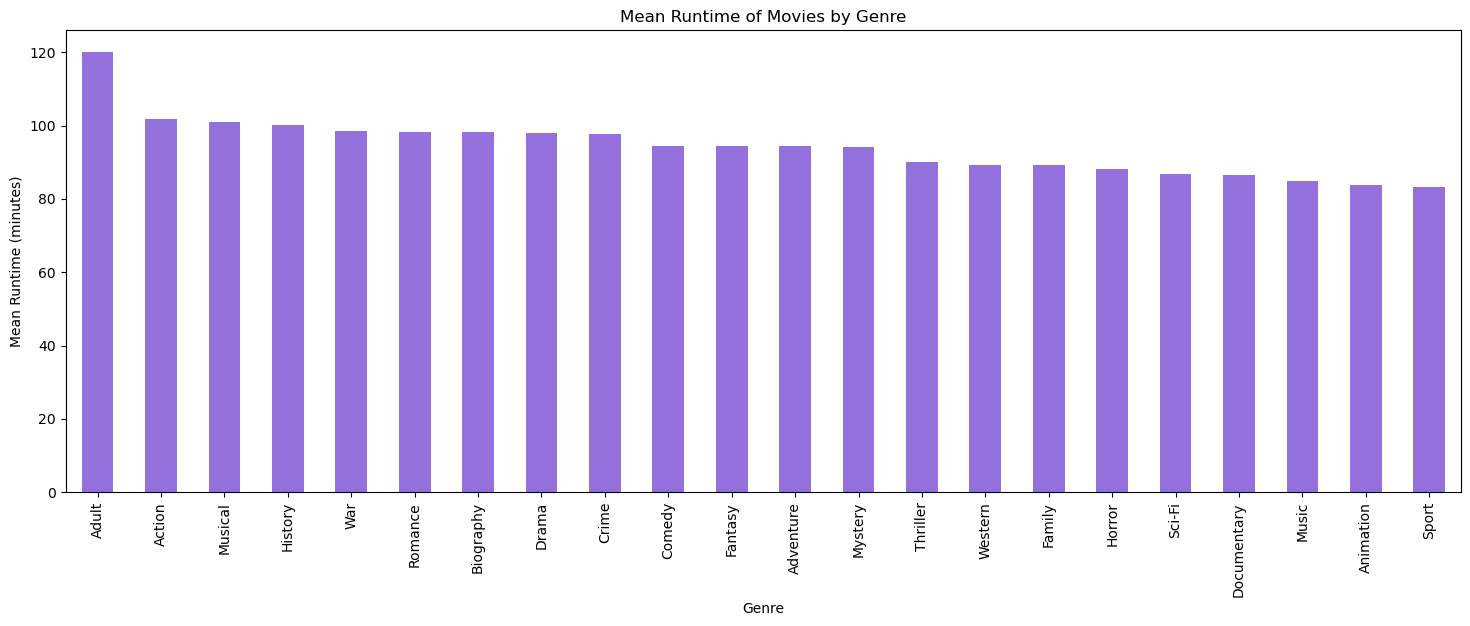

In [259]:
genre_mean_runtime = df.groupby('genre_1')['runtime_minutes'].mean().sort_values(ascending=False)

# Plot 
plt.figure(figsize=(18, 6))
genre_mean_runtime.plot(kind='bar', color='mediumpurple')
plt.title('Mean Runtime of Movies by Genre')
plt.ylabel('Mean Runtime (minutes)')
plt.xlabel('Genre')
plt.show()

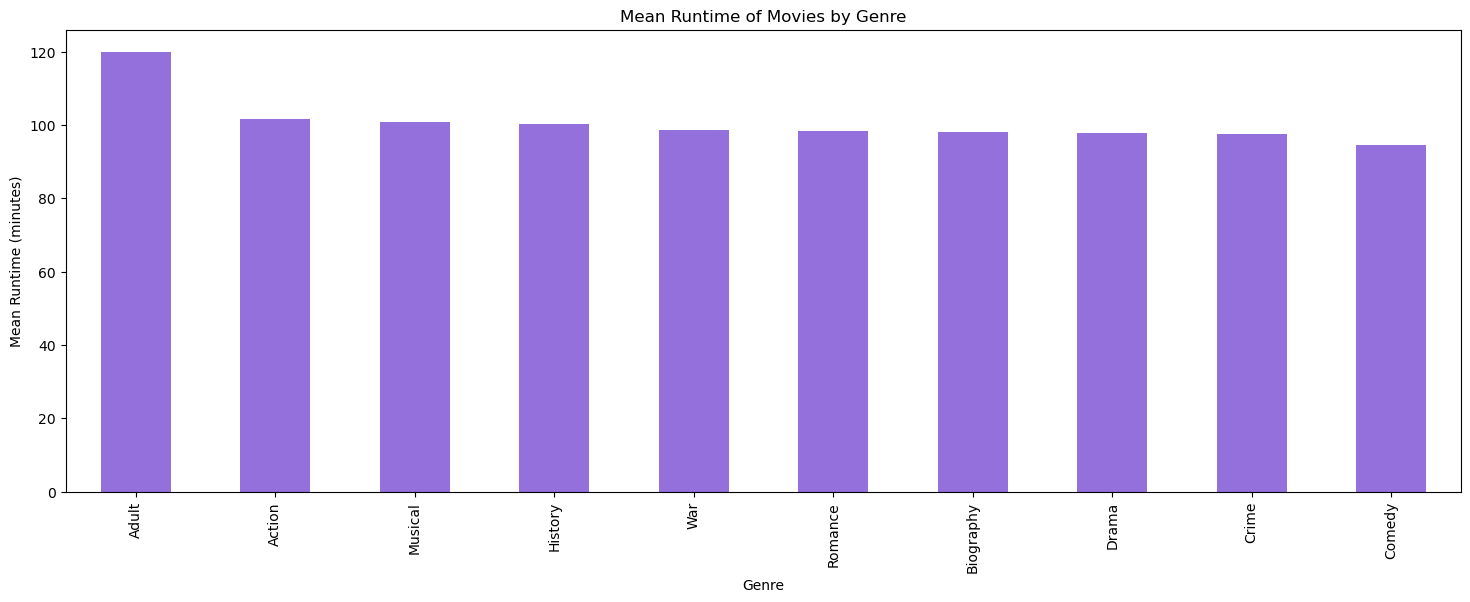

In [260]:
genre_mean_runtime = df.groupby('genre_1')['runtime_minutes'].mean().sort_values(ascending=False)[:10]

# Plot 
plt.figure(figsize=(18, 6))
genre_mean_runtime.plot(kind='bar', color='mediumpurple')
plt.title('Mean Runtime of Movies by Genre')
plt.ylabel('Mean Runtime (minutes)')
plt.xlabel('Genre')
plt.show()

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18268 entries, 2 to 75816
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     18268 non-null  object        
 1   title                  18268 non-null  object        
 2   original_title         18268 non-null  object        
 3   start_year             18268 non-null  int64         
 4   runtime_minutes        18268 non-null  float64       
 5   genres                 18268 non-null  object        
 6   averagerating          18268 non-null  float64       
 7   numvotes               18268 non-null  int64         
 8   release_date           18268 non-null  datetime64[ns]
 9   movie_age              18268 non-null  object        
 10  movie_length           18268 non-null  object        
 11  adjusted_movie_rating  18268 non-null  float64       
 12  title_similarity       18268 non-null  int64         
 13  month 

## ANOVA

- **Null Hypothesis ($𝐻_0$):** The mean ratings of movies are the same across all genres.
- **Alternative Hypothesis ($𝐻_1$):** At least one genre has a mean rating that is significantly different from the others.

In [262]:
from scipy.stats import f_oneway

# Group ratings by genres
groups = [df[df['genre_1'] == genre]['adjusted_movie_rating'] for genre in df['genre_1'].unique()]

# Perform ANOVA
f_stat, p_value = f_oneway(*groups)

# Results
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference in ratings between genres.")
else:
    print("No significant difference in ratings between genres.")


F-statistic: 59.09605422006509
P-value: 3.1623897635294424e-241
There is a significant difference in ratings between genres.


# Multivariate Analysis 

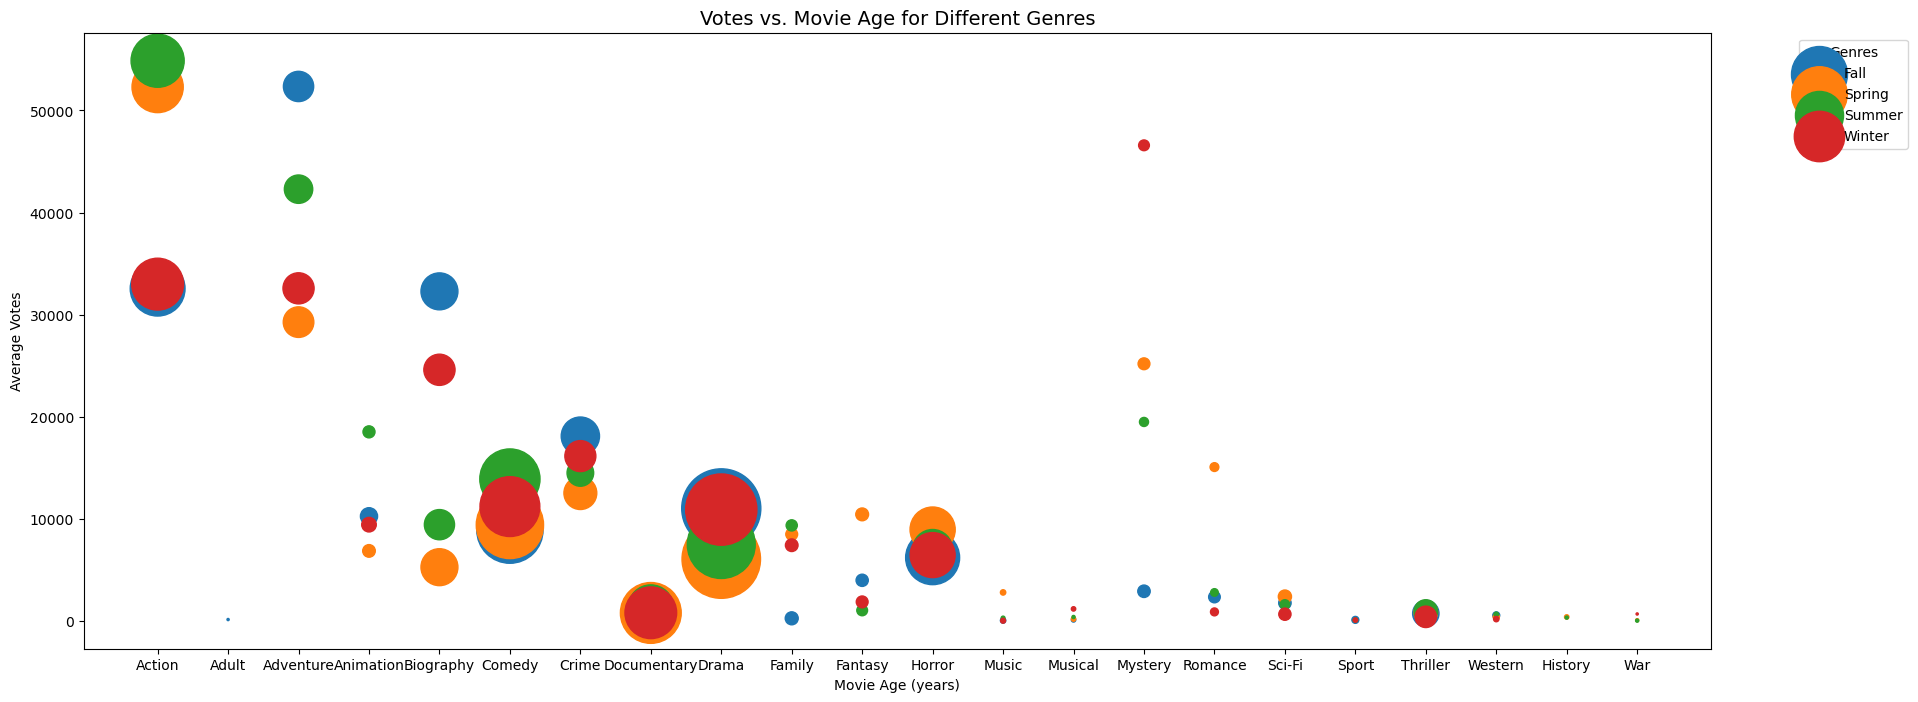

In [311]:
# Group data by genres and movie age
genre_age_data = df.groupby(['genre_1', 'season']).agg({
    'numvotes': 'mean',
    'id': 'count'  # Total movies in each genre and age group
}).reset_index()[:]

# Bubble chart for numvotes vs. movie age for genres
plt.figure(figsize=(21, 8))
for genre in genre_age_data['season'].unique():
    genre_subset = genre_age_data[genre_age_data['season'] == genre]
    plt.scatter(
        genre_subset['genre_1'], 
        genre_subset['numvotes'], 
        s=genre_subset['id'] * 2.5,  # Scale bubble size
        label=genre, alpha=1
    )

# Add titles, labels, and legend
plt.title('Votes vs. Movie Age for Different Genres', fontsize=14)
plt.xlabel('Movie Age (years)')
plt.ylabel('Average Votes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Genres')
plt.show()

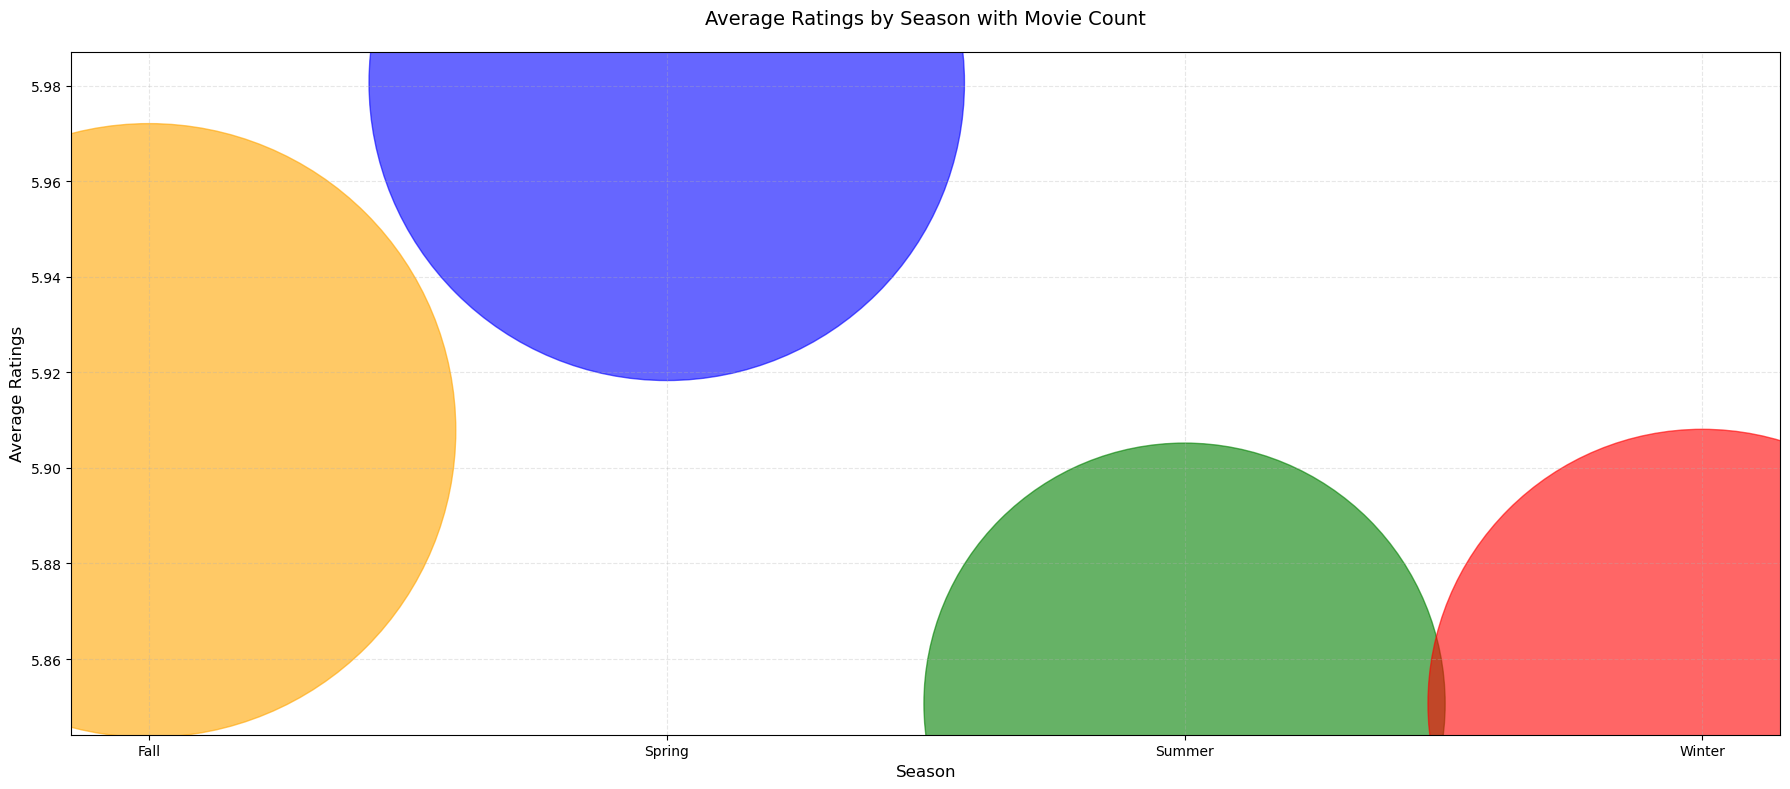

In [306]:
import matplotlib.pyplot as plt
import numpy as np

# Group data by season
seasonal_data = df.groupby('season').agg({
    'averagerating': 'mean',
     'adjusted_movie_rating': 'mean',
    'id': 'count'  # Total movies per season
}).reset_index()

# Create color map for seasons
colors = ['orange', 'blue', 'green', 'red']
season_colors = dict(zip(seasonal_data['season'], colors))

# Create figure with larger size
plt.figure(figsize=(18, 8))

# Create scatter plot with different sizes
scatter = plt.scatter(
    seasonal_data['season'], 
     seasonal_data['averagerating'], 
    s=seasonal_data['id'] * 37,  # Bubble size based on number of movies
    alpha=0.6,
    c=colors,
    label=seasonal_data['season']
)

# Add titles and labels
plt.title('Average Ratings by Season with Movie Count', fontsize=14, pad=20)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Ratings', fontsize=12)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.3)

# Adjust layout to prevent legend overlap
plt.tight_layout()

plt.show()


### Observation
- Best time for movie production is during summer and winter (smaller bubbles)
- Best time to release is during Spring and much emphasis in Fall (larger bubbles) 

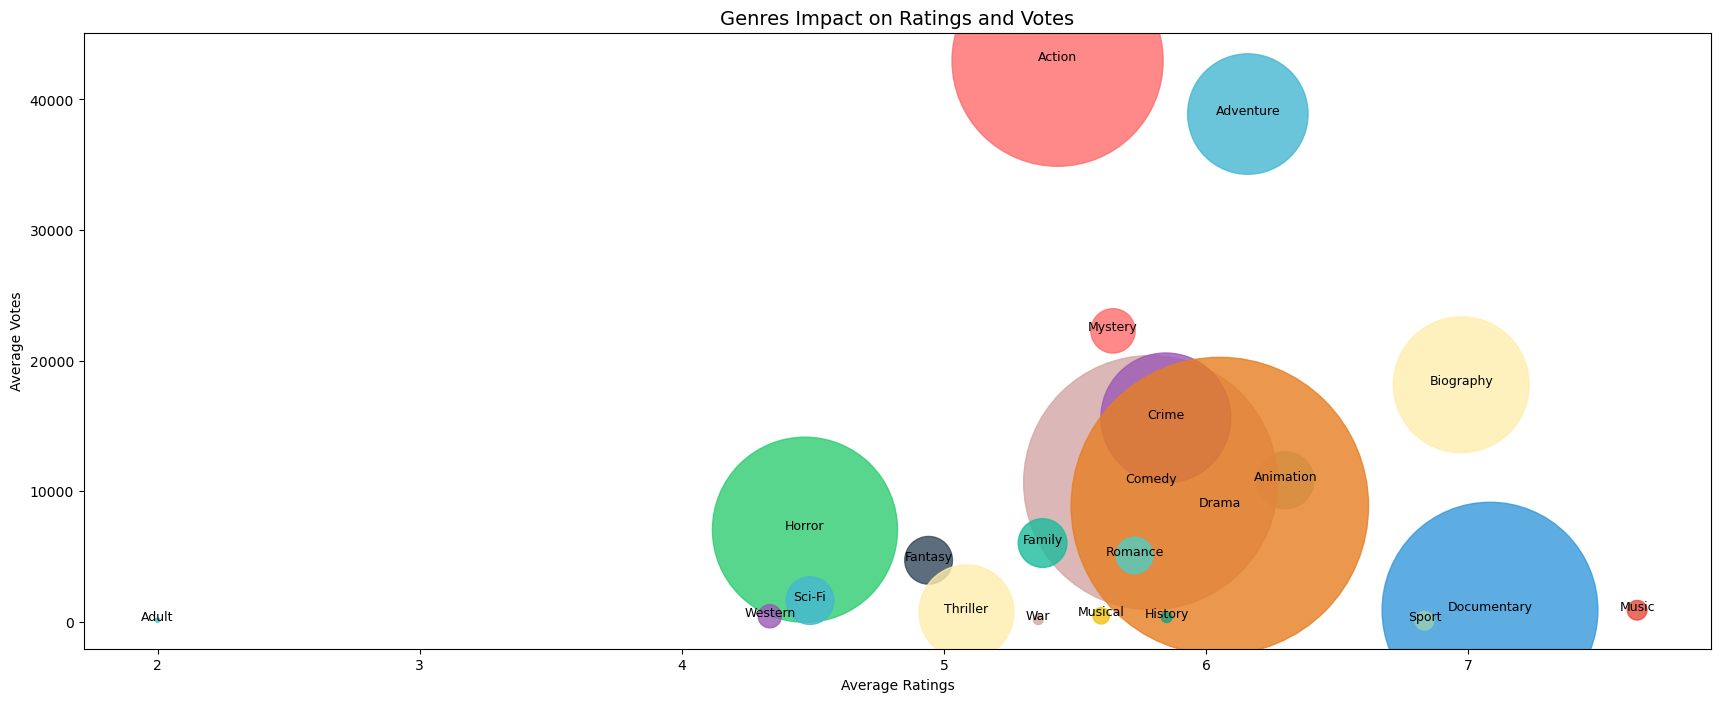

In [320]:
# Group data by genres
genre_data = df.groupby('genre_1').agg({
    'averagerating': 'mean',
    'numvotes': 'mean',
    'id': 'count'  # Total movies in each genre
}).reset_index()

# Create a color palette for genres
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEEAD', 
          '#D4A5A5', '#9B59B6', '#3498DB', '#E67E22', '#1ABC9C',
          '#34495E', '#16A085', '#2ECC71', '#E74C3C', '#F1C40F',
         '#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEEAD', 
          '#D4A5A5', '#9B59B6']

# Bubble chart for genres
plt.figure(figsize=(21, 8))
plt.scatter(
    genre_data['averagerating'], 
    genre_data['numvotes'], 
    s=genre_data['id'] * 10,  # Scale bubble size
    alpha=0.8,
    c=colors[:len(genre_data)]  # Use colors up to number of genres
)

# Add titles, labels, and genre annotations
plt.title('Genres Impact on Ratings and Votes', fontsize=14)
plt.xlabel('Average Ratings')
plt.ylabel('Average Votes')

for i, genre in enumerate(genre_data['genre_1']):
    plt.text(
        genre_data['averagerating'][i], 
        genre_data['numvotes'][i], 
        genre, fontsize=9, ha='center'
    )

plt.show()

## Observations
- Action and Adventure - Average rating but most votes 

In [336]:
from collections import Counter
import pandas as pd

# Combine genres and show the value counts
all_genres = df[['genre_1']].stack().dropna()
genre_counts = Counter(all_genres)
print(f"Genre Counts {genre_counts}") 

# Aggregate by numvotes and averagerating
genre_aggregates = (
    df[['genre_1', 'numvotes', 'averagerating']]
    .melt(id_vars = ['numvotes', 'averagerating'], value_vars=['genre_1'], value_name='genre')
    .dropna()
    .groupby('genre')
    .agg({'numvotes': 'sum', 'averagerating': 'mean'})
    .sort_values(by='numvotes', ascending=False)
)
print("Aggregated Data")
print(genre_aggregates)

Genre Counts Counter({'Drama': 4585, 'Comedy': 3343, 'Documentary': 2414, 'Action': 2310, 'Horror': 1776, 'Biography': 957, 'Crime': 874, 'Adventure': 752, 'Thriller': 467, 'Animation': 168, 'Family': 123, 'Fantasy': 118, 'Sci-Fi': 118, 'Mystery': 102, 'Romance': 69, 'Western': 28, 'Music': 20, 'Sport': 18, 'Musical': 14, 'History': 6, 'War': 5, 'Adult': 1})
Aggregated Data
             numvotes  averagerating
genre                               
Action       99238248       5.433636
Drama        40667096       6.052650
Comedy       35664010       5.788633
Adventure    29235834       6.159574
Biography    17373164       6.973877
Crime        13647307       5.846568
Horror       12528674       4.469820
Mystery       2272526       5.645098
Documentary   2164604       7.083471
Animation     1821287       6.302976
Family         742433       5.376423
Fantasy        556329       4.941525
Romance        351272       5.727536
Thriller       341668       5.086081
Sci-Fi         192283       4.4

In [337]:
genre_aggregates['cumulative_votes'] = genre_aggregates['numvotes'].cumsum() / genre_aggregates['numvotes'].sum() * 100
genre_aggregates['cumulative_rating'] = genre_aggregates['averagerating'].cumsum() / genre_aggregates['averagerating'].sum() * 100


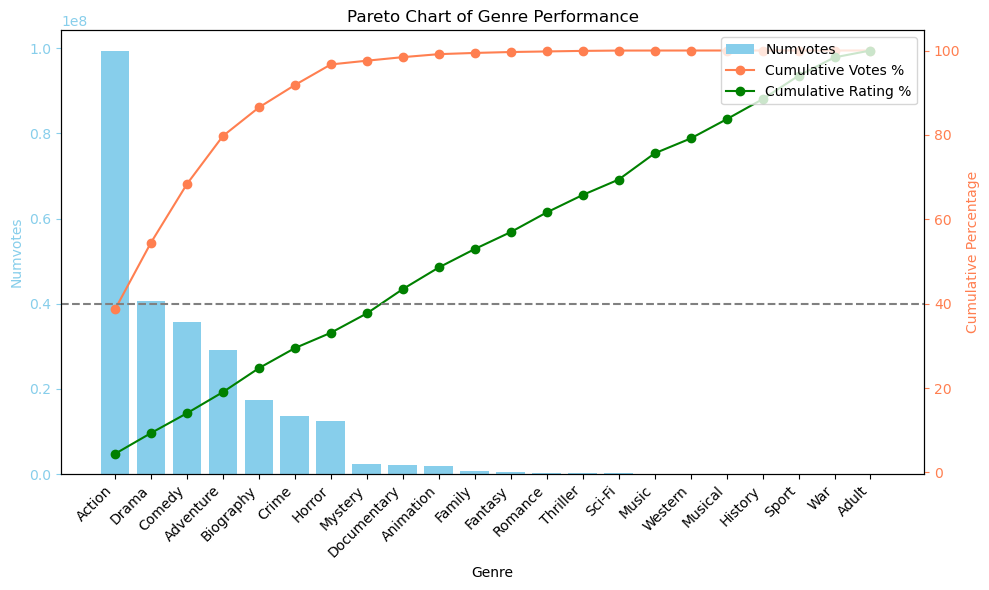

In [339]:
# Create the Pareto chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for numvotes
ax1.bar(genre_aggregates.index, genre_aggregates['numvotes'], color='skyblue', label='Numvotes')
ax1.set_xlabel('Genre')
ax1.set_ylabel('Numvotes', color='skyblue')
ax1.tick_params('y', colors='skyblue')
plt.xticks(rotation=45, ha='right')
ax2 = ax1.twinx()

# Line chart for cumulative percentages
ax2.plot(genre_aggregates.index, genre_aggregates['cumulative_votes'], color='coral', marker='o', label='Cumulative Votes %')
ax2.plot(genre_aggregates.index, genre_aggregates['cumulative_rating'], color='green', marker='o', label='Cumulative Rating %')
ax2.set_ylabel('Cumulative Percentage', color='coral')
ax2.tick_params('y', colors='coral')

# Adding horizontal lines at the 80% level
ax2.axhline(40, color='gray', linestyle='--')
# Title and legend
plt.title('Pareto Chart of Genre Performance')
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax2.transAxes)
# Adjust layout and show the plot
plt.tight_layout()
plt.show()